---

<center> <h1> Challenge: House Prices - Advanced Regression Techniques </h1> </center>

<center> <h3> Julián Alvarez de Giorgi </h3> </center>

In [1]:
Colab = False


In [ ]:
if Colab:
  from google.colab import drive
  drive.mount('/content/drive')

  %cd drive/MyDrive/Challenge:HouesPrices/



**Importing necessary libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import opendatasets # Uses Kaggle API to download datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import norm
from scipy.stats import entropy, kurtosis, skew
import scipy.stats as stats


import sklearn.ensemble as ensemble
from sklearn.model_selection import GridSearchCV


**Download Data Challenge**

In [4]:
if not Colab:
  challenge_url = 'https://www.kaggle.com/c/house-prices-advanced-regression-techniques'
  opendatasets.download(challenge_url)

Skipping, found downloaded files in ".\house-prices-advanced-regression-techniques" (use force=True to force download)


---

## 1.0 Understanding the data

In [5]:
with open('house-prices-advanced-regression-techniques/data_description.txt', 'r') as file:
    data_description = file.read()

print(data_description)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

---

## 2.0 Load Datasets

In [7]:
train_df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

**Rmk:** How the test data is not labeled, the trainning data will be split into training and validation data for model evaluation purposes. The data is splitten now because, even though the processing will be the same, we need to split it to compute some statistics, for example trainning data mean and std, to normalize the data, also the median of the categorical data to fill the missing values.

In [10]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, shuffle=True)

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


---

## 3.0 Exploratory Data Analysis

**Rmk:** We already see some NaN values in the dataset, let's start by checking the missing values in the dataset. For this, we will merge the train, val and test datasets to check the missing values in the whole dataset. However, we will take the statistics from the train dataset.

**Merge datasets**

In [12]:
# Add 'SalePrice' column to test_df
test_df['SalePrice'] = -1

entire_df = pd.concat([train_df, val_df, test_df], axis=0, ignore_index=True)

entire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### 3.1 Missing values

In [13]:
missing_values = entire_df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
missing_values_percentage = missing_values / len(entire_df) * 100
missing_values_percentage


PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Functional       0.068517
Utilities        0.068517
GarageArea       0.034258
GarageCars       0.034258
Electrical       0.034258
KitchenQual      0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
dtype: float64

There're some features that seems to have a lot of missing values, but maybe `NaN` is a valid value for them, for example, the `PoolQC` feature, which indicates the quality of the pool, a `NaN` means that there's no pool in the house. Let's print the description of the features for each of the features that have more than 40% of missing values. Normally 40% is a good threshold to keep or discard variables[Paul Madley-Dowd et al, 2019.](https://doi.org/10.1016/j.jclinepi.2019.02.016)

In [14]:
def feature_description(feature_name):
    start = data_description.find(feature_name)
    if train_df.columns.get_loc(feature_name) == len(train_df.columns) - 1:
        end = len(data_description)
    else:
        end = data_description.find(train_df.columns[train_df.columns.get_loc(feature_name) + 1])
    return data_description[start:end]



for feat in missing_values_percentage.index[missing_values_percentage>40]:
    print(feature_description(feat))

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		



As we can see, those `Nan`'s are not missing values, when encoding categorical data after, they will be important information. Let's see the other varaibles.

In [13]:
for feat in missing_values_percentage.index[missing_values_percentage<=40]:
    print(feature_description(feat))

LotFrontage: Linear feet of street connected to property


GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		

GarageYrBlt: Year garage was built
		

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mim

A lot of `Nan`'s values seems to have sense, and seems to not correspond to missing values (mainly in categorical data).

However, there are some other features that have missing values, let's check them.
The features that have missing values are:

In [14]:
for feat in missing_values_percentage.index:
    if 'NA' not in feature_description(feat):
        print(feat)

LotFrontage
GarageYrBlt
MasVnrType
MasVnrArea
MSZoning
BsmtFullBath
BsmtHalfBath
Functional
Utilities
GarageArea
GarageCars
Electrical
KitchenQual
TotalBsmtSF
BsmtUnfSF
BsmtFinSF2
BsmtFinSF1
Exterior2nd
Exterior1st
SaleType


#### Analyse each feature separately

We will create for each feature a dataframe with the feature name and the strategy to fill the missing values as the value, also an associated feature, for features that have an strongly relation with other features, we will fill the missing values based on the other features.


In [15]:
strategie_df = pd.DataFrame(columns=['Feature', 'Imputation Strategy', 'Associated Feature'])

for feat in missing_values_percentage.index:
    if 'NA' in feature_description(feat):
        strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': [feat], 'Imputation Strategy': ['None'], 'Associated Feature': [None]})], axis=0)
strategie_df

,Feature,Imputation Strategy,Associated Feature
0,PoolQC,None,None
0,MiscFeature,None,None
0,Alley,None,None
0,Fence,None,None
0,FireplaceQu,None,None
0,GarageFinish,None,None
0,GarageQual,None,None
0,GarageCond,None,None
0,GarageType,None,None
0,BsmtExposure,None,None


- Let's studdy `LotFrontage` feature. This feature has a lot of missing values, but those could mean that the house has no frontage, let's first check that this feature has no 0 values.

In [16]:
# print lotFrontage is 0
print('Nans in LotFrontage:', train_df['LotFrontage'].isnull().sum())
train_df['LotFrontage'].value_counts()

Nans in LotFrontage: 217


60.0     112
70.0      57
80.0      54
50.0      47
75.0      42
        ... 
106.0      1
168.0      1
141.0      1
144.0      1
153.0      1
Name: LotFrontage, Length: 107, dtype: int64

The `LotFrontage` feature has 0 zeros, so is highly likely that the missing values are due to the fact that the house has no frontage (not having a direct acces to street). However, if we see the `street` feature, it doesn't have a `NA` value, neither have missing values, so it is confusing. On the other hand, we might think that if the house does not have acces by the street it should be acced by a common alley, wich is contemplated by the `Alley` feature. This features however does have a `NA` value category (not all houses have alley), so maybe `LotFrontage` contemplates the alley frontage as well, and the street feature could mean the nearest street to the house. Let's check if the Nan values in `LotFrontage` are related to the Nan values in `Alley`.

In [17]:
print('Class Balance street: \n', train_df['Street'].value_counts())
print('Number of Nans in Street:', train_df['Street'].isnull().sum())
print('Number of Nans in Alley:', entire_df['Alley'].isnull().sum())
print('Number of Nans in LotFrontage:', entire_df['LotFrontage'].isnull().sum())
print('Number of Nans in LotFrontage that correspond to Nans in Alley:', entire_df['Alley'][entire_df['LotFrontage'].isnull()].isnull().sum())
print('There are: \n', entire_df['Alley'][entire_df['LotFrontage'].isnull()].value_counts(), '\nrows where Alley is not null and LotFrontage is null')


Class Balance street: 
 Pave    1164
Grvl       4
Name: Street, dtype: int64
Number of Nans in Street: 0
Number of Nans in Alley: 2721
Number of Nans in LotFrontage: 486
Number of Nans in LotFrontage that correspond to Nans in Alley: 473
There are: 
 Pave    7
Grvl    6
Name: Alley, dtype: int64 
rows where Alley is not null and LotFrontage is null


**Important** by checking this, we see that the `Street`feature is enormously unbalanced, only 4 `Grvl` values. We will drop this feature.

In [18]:
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['Street'], 'Imputation Strategy': ['Drop Feature'], 'Associated Feature': [None]})], axis=0)
strategie_df

,Feature,Imputation Strategy,Associated Feature
0,PoolQC,None,None
0,MiscFeature,None,None
0,Alley,None,None
0,Fence,None,None
0,FireplaceQu,None,None
0,GarageFinish,None,None
0,GarageQual,None,None
0,GarageCond,None,None
0,GarageType,None,None
0,BsmtExposure,None,None


Almost all of the missing values in `LotFrontage` correspond to the missing values in `Alley`, however, there are a lot of houses that don't have an alley (2446), so it is not that strongly related to conclude.

This feature is weird, I don't want to drop it because I suppose it is important, at least to me, it would be an important aspect of the house I want to buy. For now, I will be filling them with 0. This assumes that the `street` variable is the nearest street, and that the house might have access through a corridor or something like that, I know it is a strong assumption, but we will came back if necessary. Probably to improve the model, we could implement a more clever imputation technique.

In [19]:
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['LotFrontage'], 'Imputation Strategy': ['Zero'], 'Associated Feature': ['None']})], axis=0)
strategie_df

,Feature,Imputation Strategy,Associated Feature
0,PoolQC,None,None
0,MiscFeature,None,None
0,Alley,None,None
0,Fence,None,None
0,FireplaceQu,None,None
0,GarageFinish,None,None
0,GarageQual,None,None
0,GarageCond,None,None
0,GarageType,None,None
0,BsmtExposure,None,None


- Let's continue with `GarageYrBlt` feature. The most obvious explanation is that the house does not have a garage, let's check that.

In [20]:
print('Number of zeros in GarageYrBlt:', (entire_df['GarageYrBlt'] == 0.0).sum())
print('Number of Nans in GarageYrBlt:', entire_df['GarageYrBlt'].isnull().sum())
print('Number of Nans in GarageCond:', entire_df['GarageCond'].isnull().sum())
print('Number of Nans in GarageCond that correspond to Nans in GarageYrBlt:', entire_df['GarageCond'][entire_df['GarageYrBlt'].isnull()].isnull().sum())
print('However !! There are: \n', entire_df['GarageType'][entire_df['GarageYrBlt'].isnull()].value_counts() ,
      '\nrows where GarageType is not null but GarageYrBlt and GarageCond is null')
print('Number of Nans in GarageFinish that correspond to Nans in GarageYrBlt:', entire_df['GarageFinish'][entire_df['GarageYrBlt'].isnull()].isnull().sum())

Number of zeros in GarageYrBlt: 0
Number of Nans in GarageYrBlt: 159
Number of Nans in GarageCond: 159
Number of Nans in GarageCond that correspond to Nans in GarageYrBlt: 159
However !! There are: 
 Detchd    2
Name: GarageType, dtype: int64 
rows where GarageType is not null but GarageYrBlt and GarageCond is null
Number of Nans in GarageFinish that correspond to Nans in GarageYrBlt: 159


Here we see that the missing values in `GarageYrBlt` correspond to the missing values in `GarageCond` and `GarageFinish`. We will fill to 0 the missing values in `GarageYrBlt`. Furthermore, we will fill the 2 values in `GarageType` that contradict the other 3 features.

In [21]:
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['GarageYrBlt'], 'Imputation Strategy': ['Zero'], 'Associated Feature': ['None']})], axis=0)


# Set to Nan, I know is not neatest way to do it, but Is going to work.
idx_to_fill = entire_df['GarageType'][entire_df['GarageYrBlt'].isnull()][entire_df['GarageType'][entire_df['GarageYrBlt'].isnull()] == 'Detchd'].index
entire_df.loc[idx_to_fill, 'GarageType'] = np.nan
entire_df['GarageType'][entire_df['GarageYrBlt'].isnull()].isna().sum()

159

- Now we check the `MasVnrType` and `MasVnrArea` features.

In [22]:
print(feature_description('MasVnrType'))
print(feature_description('MasVnrArea'))

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	

MasVnrArea: Masonry veneer area in square feet




Hypothesis: The missing values in `MasVnrType` correspond to the missing values in `MasVnrArea`. Let's check that.

In [23]:
if not Colab:
  print('The variable MasVnrArea has',  entire_df.loc[:,'MasVnrArea'].value_counts()[0], 'zeros')
  print('The variable MasVnrType has',  entire_df.loc[:,'MasVnrType'].value_counts()['None'], ' None values')
  print('The variable MasVnrArea has',  entire_df.loc[:,'MasVnrArea'].isna().sum(), 'missing values')
  print('The variable MasVnrType has',  entire_df.loc[:,'MasVnrType'].isna().sum(), 'missing values')
else:
  print("Don't know why the data I have in colab the 'None' in MasVnrType are all NaN, there's not such a difference")

The variable MasVnrArea has 1738 zeros
The variable MasVnrType has 1742  None values
The variable MasVnrArea has 23 missing values
The variable MasVnrType has 24 missing values


We can clearly deduce that the missing of a masory veneer is traduced to a zero in the `MasVnrArea` feature. Let's check if some of the missing values in `MasVnrArea` correspond to a `None` value in `MasVnrType`, and if it's the case, we will fill the missing values with 0.

In [24]:
entire_df['MasVnrType'][entire_df['MasVnrArea'].isna()].isna().sum()


23

All missing values in `MasVnrArea` correspond to `NaN`'s in the `masVnrType` feature, wich makes sense, they might probably correspond to errors in the data collection process. We will fill the missing values with the mode in `MasVnrType`, and with the mean of the corresponding `MasVnrType` category in `MasVnrArea`.

In [25]:
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['MasVnrType'], 'Imputation Strategy': ['mode'], 'Associated Feature': [None]})], axis=0)
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['MasVnrArea'], 'Imputation Strategy': ['mean'], 'Associated Feature': ['MasVnrType']})], axis=0)
strategie_df

,Feature,Imputation Strategy,Associated Feature
0,PoolQC,None,None
0,MiscFeature,None,None
0,Alley,None,None
0,Fence,None,None
0,FireplaceQu,None,None
0,GarageFinish,None,None
0,GarageQual,None,None
0,GarageCond,None,None
0,GarageType,None,None
0,BsmtExposure,None,None


- Next feature is `MSZoning`, let's check it.

In [26]:
print(feature_description('MSZoning'))

print('The variable MSZoning has',  entire_df.loc[:,'MSZoning'].isna().sum(), 'missing values')

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	

The variable MSZoning has 4 missing values


There are 4 missing values in `MSZoning`, the `Neighborhood` feature might be related to the `MSZoning` feature, so it will be filled with the mode of the `MSZoning` category clustered by the `Neighborhood` feature.

In [27]:
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['MSZoning'], 'Imputation Strategy': ['mode'], 'Associated Feature': ['Neighborhood']})], axis=0)
strategie_df

,Feature,Imputation Strategy,Associated Feature
0,PoolQC,None,None
0,MiscFeature,None,None
0,Alley,None,None
0,Fence,None,None
0,FireplaceQu,None,None
0,GarageFinish,None,None
0,GarageQual,None,None
0,GarageCond,None,None
0,GarageType,None,None
0,BsmtExposure,None,None


- Next feature are `BsmtFullBath` and `BsmtHalfBath`, let's check them.

In [28]:
print(feature_description('BsmtQual'))
print(feature_description('BsmtFullBath'))
print(feature_description('BsmtHalfBath'))

print('The variable BsmtQual has',  entire_df.loc[:,'BsmtQual'].isna().sum(), 'missing values')
print('The variable BsmtFullBath has',  entire_df.loc[:,'BsmtFullBath'].isna().sum(), 'missing values')
print('The variable BsmtHalfBath has',  entire_df.loc[:,'BsmtHalfBath'].isna().sum(), 'missing values')
print('The NaNs in BstmFullBath correspond to', entire_df['BsmtQual'][entire_df['BsmtFullBath'].isna()].isna().sum(), ' NaNs in BsmtQual')
print('The NaNs in BstmHalfBath correspond to', entire_df['BsmtQual'][entire_df['BsmtHalfBath'].isna()].isna().sum(), ' NaNs in BsmtQual')

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		

BsmtFullBath: Basement full bathrooms



The variable BsmtQual has 81 missing values
The variable BsmtFullBath has 2 missing values
The variable BsmtHalfBath has 2 missing values
The NaNs in BstmFullBath correspond to 2  NaNs in BsmtQual
The NaNs in BstmHalfBath correspond to 2  NaNs in BsmtQual


Clearly, the missing values in `BsmtFullBath` and `BsmtHalfBath` correspond to houses that don't have a basement, so we will fill the missing values with 0.

In [29]:
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['BsmtFullBath'], 'Imputation Strategy': ['Zero'], 'Associated Feature': [None]})], axis=0)
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['BsmtHalfBath'], 'Imputation Strategy': ['Zero'], 'Associated Feature': [None]})], axis=0)
strategie_df

,Feature,Imputation Strategy,Associated Feature
0,PoolQC,None,None
0,MiscFeature,None,None
0,Alley,None,None
0,Fence,None,None
0,FireplaceQu,None,None
0,GarageFinish,None,None
0,GarageQual,None,None
0,GarageCond,None,None
0,GarageType,None,None
0,BsmtExposure,None,None


In [30]:
for feat in missing_values_percentage.index:
    if 'NA' not in feature_description(feat):
        print(feat)

LotFrontage
GarageYrBlt
MasVnrType
MasVnrArea
MSZoning
BsmtFullBath
BsmtHalfBath
Functional
Utilities
GarageArea
GarageCars
Electrical
KitchenQual
TotalBsmtSF
BsmtUnfSF
BsmtFinSF2
BsmtFinSF1
Exterior2nd
Exterior1st
SaleType


- Next, let's check the `Functional` feature.

In [31]:
print(feature_description('Functional'))
print('The variable Functional has',  entire_df.loc[:,'Functional'].isna().sum(), 'missing values')
print('Class Balances: \n' , entire_df['Functional'].value_counts())

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		

The variable Functional has 2 missing values
Class Balances: 
 Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64


As the `Functional` feature description says, we will assume that the missing values correspond to `Typ` (typical) values. Is the most common category, so we will use the mode to fill the missing values.

In [32]:
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['Functional'], 'Imputation Strategy': ['mode'], 'Associated Feature': [None]})], axis=0)
strategie_df

,Feature,Imputation Strategy,Associated Feature
0,PoolQC,None,None
0,MiscFeature,None,None
0,Alley,None,None
0,Fence,None,None
0,FireplaceQu,None,None
0,GarageFinish,None,None
0,GarageQual,None,None
0,GarageCond,None,None
0,GarageType,None,None
0,BsmtExposure,None,None


- Now, let's analyze the `Utilities` feature.

In [33]:
print(feature_description('Utilities'))
print('The variable Utilities has',  entire_df.loc[:,'Utilities'].isna().sum(), 'missing values')

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	

The variable Utilities has 2 missing values


Maybe those missing values has something to do with the `Electrical` feature missing values, let's check that.

In [34]:
print(feature_description('Electrical'))
print('The variable Electrical has',  entire_df.loc[:,'Electrical'].isna().sum(), 'missing values')
print('The missing values in Electrical correspond to', entire_df['Utilities'][entire_df['Electrical'].isna()].isna().sum(), 'missing values in Utilities')

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		

The variable Electrical has 1 missing values
The missing values in Electrical correspond to 0 missing values in Utilities


It does not seem like it, let's fill it with the mode. And let's fill `Electrical` with the mode as well.

In [35]:
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['Utilities'], 'Imputation Strategy': ['mode'], 'Associated Feature': [None]})], axis=0)
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['Electrical'], 'Imputation Strategy': ['mode'], 'Associated Feature': [None]})], axis=0)
strategie_df

,Feature,Imputation Strategy,Associated Feature
0,PoolQC,None,None
0,MiscFeature,None,None
0,Alley,None,None
0,Fence,None,None
0,FireplaceQu,None,None
0,GarageFinish,None,None
0,GarageQual,None,None
0,GarageCond,None,None
0,GarageType,None,None
0,BsmtExposure,None,None


- Let's move on to `GarageArea` and `GarageCars` features.

In [36]:
print(feature_description('GarageArea'))
print(feature_description('GarageCars'))
print('The variable GarageArea has',  entire_df.loc[:,'GarageArea'].isna().sum(), 'missing values')
print('The variable GarageCars has',  entire_df.loc[:,'GarageCars'].isna().sum(), 'missing values')
print('The missing values in GarageArea correspond to', entire_df['GarageCars'][entire_df['GarageArea'].isna()].isna().sum(), 'missing values in GarageCars')
print('GarageType of the missing GarageArea and GarageCars:', entire_df['GarageType'][entire_df['GarageArea'].isna()].isna().sum())

GarageArea: Size of garage in square feet


GarageCars: Size of garage in car capacity


The variable GarageArea has 1 missing values
The variable GarageCars has 1 missing values
The missing values in GarageArea correspond to 1 missing values in GarageCars
GarageType of the missing GarageArea and GarageCars: 1


The missing values in `GarageArea` and `GarageCars` correspond to the same houses, it doesn´t have a garage (`GarageType` is missing), so we will fill the missing values with 0.

In [37]:
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['GarageArea'], 'Imputation Strategy': ['Zero'], 'Associated Feature': [None]})], axis=0)
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['GarageCars'], 'Imputation Strategy': ['Zero'], 'Associated Feature': [None]})], axis=0)
strategie_df

,Feature,Imputation Strategy,Associated Feature
0,PoolQC,None,None
0,MiscFeature,None,None
0,Alley,None,None
0,Fence,None,None
0,FireplaceQu,None,None
0,GarageFinish,None,None
0,GarageQual,None,None
0,GarageCond,None,None
0,GarageType,None,None
0,BsmtExposure,None,None


- Let's continue with `KitchenQual` feature

In [38]:
print(feature_description('KitchenQual'))
print('The variable KitchenQual has',  entire_df.loc[:,'KitchenQual'].isna().sum(), 'missing values')
print('Class Balance: \n', entire_df['KitchenQual'].value_counts())

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	

The variable KitchenQual has 1 missing values
Class Balance: 
 TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64


Let's set it to the mode. `Typical/Average` in this case.

In [39]:
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['KitchenQual'], 'Imputation Strategy': ['mode'], 'Associated Feature': [None]})], axis=0)
strategie_df

,Feature,Imputation Strategy,Associated Feature
0,PoolQC,None,None
0,MiscFeature,None,None
0,Alley,None,None
0,Fence,None,None
0,FireplaceQu,None,None
0,GarageFinish,None,None
0,GarageQual,None,None
0,GarageCond,None,None
0,GarageType,None,None
0,BsmtExposure,None,None


- Almost there!! Let's check the `TotalBsmtSF`,  `BsmtUnfSF`, `BsmtFinSF2` and `BsmtFinSF1`, features.

In [40]:
print(feature_description('TotalBsmtSF'))
print(feature_description('BsmtUnfSF'))
print(feature_description('BsmtFinSF2'))
print(feature_description('BsmtFinSF1'))

print('The variable TotalBsmtSF has',  entire_df['TotalBsmtSF'].isna().sum(), 'missing values')
print('The variable BsmtUnfSF has',  entire_df['BsmtUnfSF'].isna().sum(), 'missing values')
print('The variable BsmtFinSF2 has',  entire_df['BsmtFinSF2'].isna().sum(), 'missing values')
print('The variable BsmtFinSF1 has',  entire_df['BsmtFinSF1'].isna().sum(), 'missing values')
print('The missing value of TotalBsmtSF correspond to the ID: ', entire_df['Id'][entire_df['TotalBsmtSF'].isna()].values)
print('The missing value of BsmtUnfSF correspond to the ID: ', entire_df['Id'][entire_df['BsmtUnfSF'].isna()].values)
print('The missing value of BsmtFinSF2 correspond to the ID: ', entire_df['Id'][entire_df['BsmtFinSF2'].isna()].values)
print('The missing value of BsmtFinSF1 correspond to the ID: ', entire_df['Id'][entire_df['BsmtFinSF1'].isna()].values)



TotalBsmtSF: Total square feet of basement area


BsmtUnfSF: Unfinished square feet of basement area


BsmtFinSF2: Type 2 finished square feet


BsmtFinSF1: Type 1 finished square feet


The variable TotalBsmtSF has 1 missing values
The variable BsmtUnfSF has 1 missing values
The variable BsmtFinSF2 has 1 missing values
The variable BsmtFinSF1 has 1 missing values
The missing value of TotalBsmtSF correspond to the ID:  [2121]
The missing value of BsmtUnfSF correspond to the ID:  [2121]
The missing value of BsmtFinSF2 correspond to the ID:  [2121]
The missing value of BsmtFinSF1 correspond to the ID:  [2121]


We will fill it with 0, as it does not have a basement.

In [41]:
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['TotalBsmtSF'], 'Imputation Strategy': ['Zero'], 'Associated Feature': [None]})], axis=0)
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['BsmtUnfSF'], 'Imputation Strategy': ['Zero'], 'Associated Feature': [None]})], axis=0)
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['BsmtFinSF2'], 'Imputation Strategy': ['Zero'], 'Associated Feature': [None]})], axis=0)
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['BsmtFinSF1'], 'Imputation Strategy': ['Zero'], 'Associated Feature': [None]})], axis=0)
strategie_df

,Feature,Imputation Strategy,Associated Feature
0,PoolQC,None,None
0,MiscFeature,None,None
0,Alley,None,None
0,Fence,None,None
0,FireplaceQu,None,None
0,GarageFinish,None,None
0,GarageQual,None,None
0,GarageCond,None,None
0,GarageType,None,None
0,BsmtExposure,None,None


- Let's check the `Exterior1st` and `Exterior2nd` features.

In [42]:
print(feature_description('Exterior1st'))
print(feature_description('Exterior2nd'))
print('The variable Exterior1st has',  entire_df['Exterior1st'].isna().sum(), 'missing values')
print('The variable Exterior2nd has',  entire_df['Exterior2nd'].isna().sum(), 'missing values')
print('The missing value of Exterior1st correspond to the ID: ', entire_df['Id'][entire_df['Exterior1st'].isna()].values)
print('The missing value of Exterior2nd correspond to the ID: ', entire_df['Id'][entire_df['Exterior2nd'].isna()].values)
print('Class Balance: \n', entire_df['Exterior1st'].value_counts())
print('Class Balance: \n', entire_df['Exterior2nd'].value_counts())

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wo

Let's fill it with the mode in both cases.

In [43]:
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['Exterior1st'], 'Imputation Strategy': ['mode'], 'Associated Feature': [None]})], axis=0)
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['Exterior2nd'], 'Imputation Strategy': ['mode'], 'Associated Feature': [None]})], axis=0)
strategie_df

,Feature,Imputation Strategy,Associated Feature
0,PoolQC,None,None
0,MiscFeature,None,None
0,Alley,None,None
0,Fence,None,None
0,FireplaceQu,None,None
0,GarageFinish,None,None
0,GarageQual,None,None
0,GarageCond,None,None
0,GarageType,None,None
0,BsmtExposure,None,None


- FINALLY !!, let's check the `SaleType` feature.

In [44]:
print(feature_description('SaleType'))
print('The variable SaleType has',  entire_df['SaleType'].isna().sum(), 'missing values')
print('Class Balance: \n', entire_df['SaleType'].value_counts())

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		

The variable SaleType has 1 missing values
Class Balance: 
 WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64


We will fill it with the mode also.

In [45]:
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['SaleType'], 'Imputation Strategy': ['mode'], 'Associated Feature': [None]})], axis=0)
strategie_df

,Feature,Imputation Strategy,Associated Feature
0,PoolQC,None,None
0,MiscFeature,None,None
0,Alley,None,None
0,Fence,None,None
0,FireplaceQu,None,None
0,GarageFinish,None,None
0,GarageQual,None,None
0,GarageCond,None,None
0,GarageType,None,None
0,BsmtExposure,None,None


####  3.1.1 Data Imputation

Many of the `Nan` values ended up being valid inputs. Whithot taking into account the `Nan` of `LotFrontage` feature, which are confusing, we don't really have a lot of "real" missing values. So I hypothesize that it will not make a big difference what we do with them, we could simply drop them. However, we will keep them, but as disscused we will not apply sophisticated imputation techniques.

**First:** Let's check first if the "Clustering" imputation technique makes sense (the associated feature). Only for informative purposes.

For example, let's check the masoney veneer case.

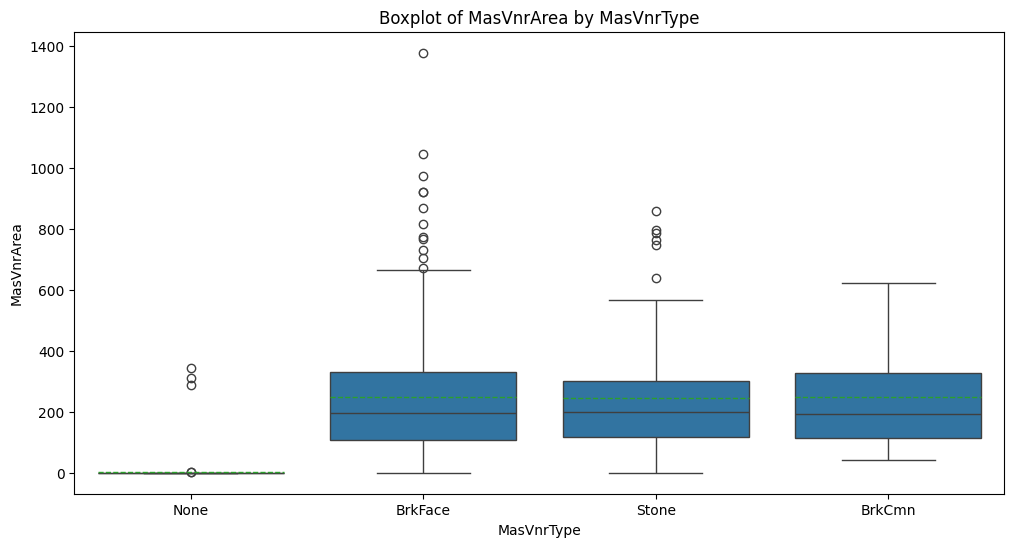

Classes balances: 
 None       677
BrkFace    366
Stone      106
BrkCmn      13
Name: MasVnrType, dtype: int64

 Mean of MasVnrArea for each class: 
 MasVnrType
BrkCmn     247.153846
BrkFace    247.505464
None         1.397341
Stone      243.745283
Name: MasVnrArea, dtype: float64


In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='MasVnrType', y='MasVnrArea', meanline=True, showmeans=True)
plt.title('Boxplot of MasVnrArea by MasVnrType')
plt.show()

print('Classes balances: \n', train_df['MasVnrType'].value_counts())
print('\n Mean of MasVnrArea for each class: \n', train_df.groupby('MasVnrType')['MasVnrArea'].mean())

The distributions are fairly similar (exept from `None`), they have similar means. However, the `None` category is the most common and we can trustly fill the missing values with 0. So maybe let's "cheat" a little bit and change the `strategie_df`, such that we fill `MasVnrType` with `None` and `MasVnrArea` with 0, this will economize some time :).

**Obs:** Is striking that the `None` category has a mean different from 0, and BrkFace has a lot of outliers. But we will see this later.

In [47]:
# Drop the row MasVnrType from strategie_df
strategie_df = strategie_df[strategie_df['Feature'] != 'MasVnrType']
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['MasVnrType'], 'Imputation Strategy': ['None'], 'Associated Feature': [None]})], axis=0)
strategie_df = strategie_df[strategie_df['Feature'] != 'MasVnrArea']
strategie_df = pd.concat([strategie_df, pd.DataFrame({'Feature': ['MasVnrArea'], 'Imputation Strategy': ['Zero'], 'Associated Feature': [None]})], axis=0)
strategie_df

,Feature,Imputation Strategy,Associated Feature
0,PoolQC,None,None
0,MiscFeature,None,None
0,Alley,None,None
0,Fence,None,None
0,FireplaceQu,None,None
0,GarageFinish,None,None
0,GarageQual,None,None
0,GarageCond,None,None
0,GarageType,None,None
0,BsmtExposure,None,None


What about the `MSZoning` feature?

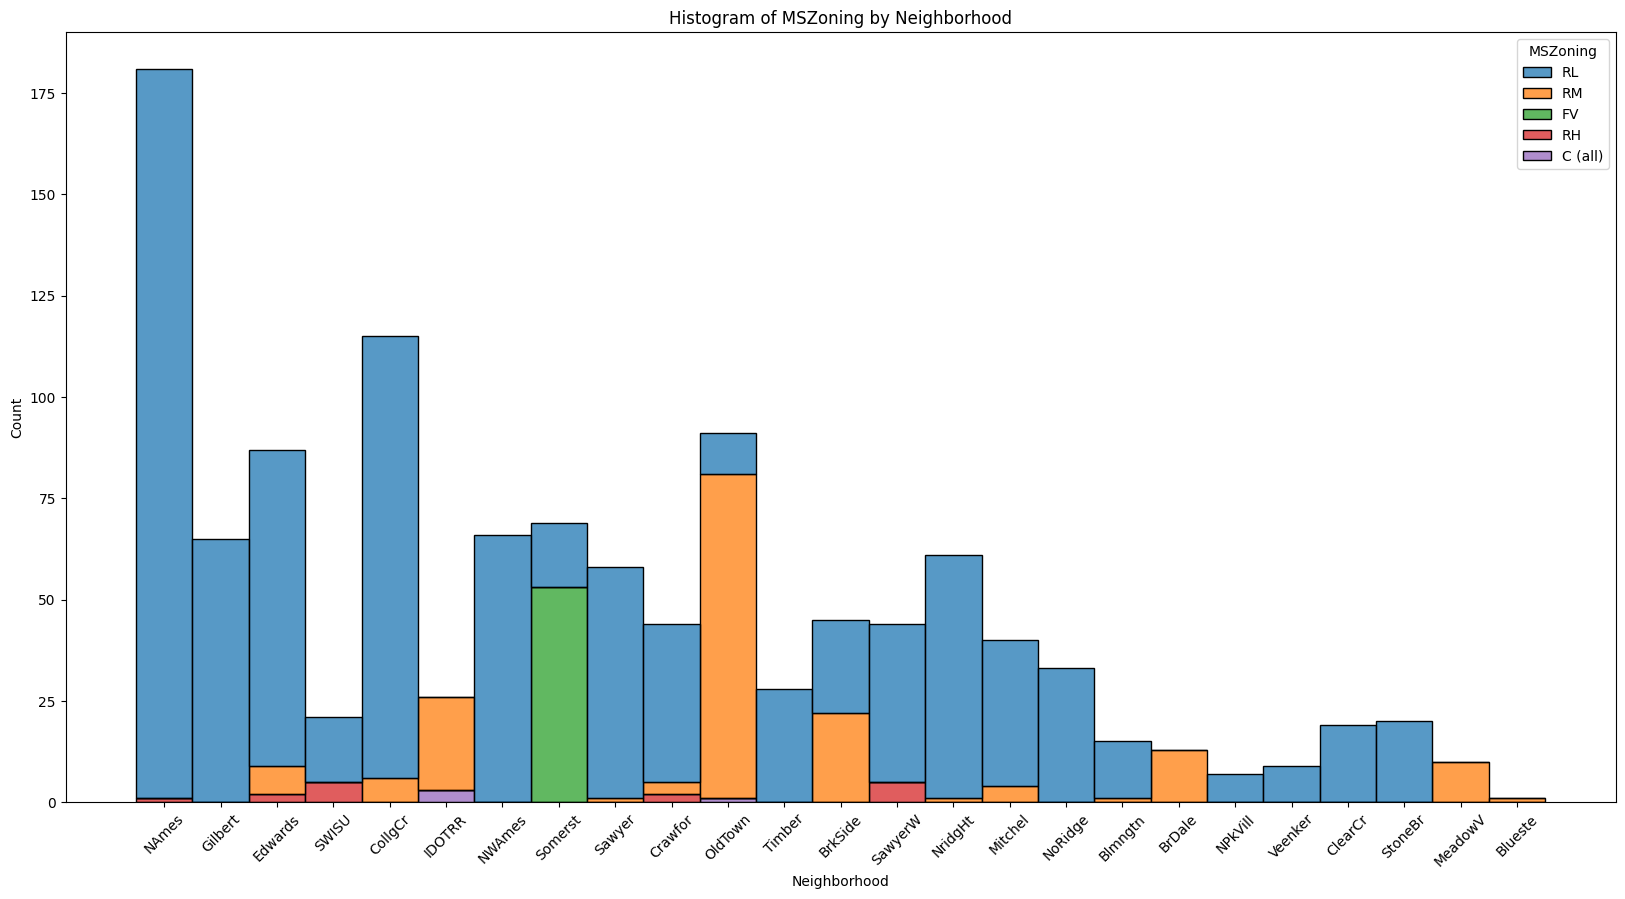

Classes balances: 
 RL         924
RM         172
FV          53
RH          15
C (all)      4
Name: MSZoning, dtype: int64


In [48]:
# Plot histograms of MSZoning by Neighborhood
plt.figure(figsize=(20, 10))
sns.histplot(data=train_df, x='Neighborhood', hue='MSZoning', multiple='stack')
plt.xticks(rotation=45)
plt.title('Histogram of MSZoning by Neighborhood')
plt.show()

print('Classes balances: \n', train_df['MSZoning'].value_counts())



In this case, we see that it makes more sense to fill the missing values with the mode of the `MSZoning` category clustered by the `Neighborhood` feature. Eventhough the most popular is `RL` in most of the neighborhoods, there are some neighborhoods that have a different mode.

**Important remarks:**
- `LotFrontage`: Hypothesis that the missing values are due to the fact that the house has no frontage. Fill with 0. (!! TO BE CHECKED !!)
- `MasVnrType`: Fill with `None` (mode), is the most common category and additionally, we can fill the `MasVnrArea` with 0 fairly confident.
- `MasVnrArea`: Fill them with 0. Is not the mean of the feature category (`None`), but is the logical value.
- `MSZoning`: Fill with the mode of the `MSZoning` category clustered by the `Neighborhood` feature.

 **Let's treat missing values!**

In [49]:
for feat in strategie_df['Feature']:
    imp_strat = strategie_df['Imputation Strategy'][strategie_df['Feature'] == feat].values[0]
    print('Imputation Strategy for', feat, 'is', imp_strat)
    if imp_strat == 'None':
        entire_df[feat] = entire_df[feat].fillna('None')
    elif imp_strat == 'Zero':
        entire_df[feat] = entire_df[feat].fillna(0)
    elif imp_strat == 'mode':
        asso_feat = strategie_df['Associated Feature'][strategie_df['Feature'] == feat].values[0]
        if asso_feat != None:
            idx_with_missing_values = np.where(entire_df[feat].isnull())[0]
            print(f'Filling the {feat} feature with the mode clustered by the {asso_feat} feature')
            for idx in idx_with_missing_values:
                entire_df[feat].iloc[idx] = train_df[feat][train_df[asso_feat] == entire_df[asso_feat].iloc[idx]].mode().values[0]  # Fill
        else:
            print(f'Filling the {feat} feature with the mode.')
            entire_df[feat].fillna(train_df[feat].mode()[0], inplace=True)
    elif imp_strat == 'Drop Feature':
        entire_df.drop(feat, axis=1, inplace=True)



Imputation Strategy for PoolQC is None
Imputation Strategy for MiscFeature is None
Imputation Strategy for Alley is None
Imputation Strategy for Fence is None
Imputation Strategy for FireplaceQu is None
Imputation Strategy for GarageFinish is None
Imputation Strategy for GarageQual is None
Imputation Strategy for GarageCond is None
Imputation Strategy for GarageType is None
Imputation Strategy for BsmtExposure is None
Imputation Strategy for BsmtCond is None
Imputation Strategy for BsmtQual is None
Imputation Strategy for BsmtFinType2 is None
Imputation Strategy for BsmtFinType1 is None
Imputation Strategy for Street is Drop Feature
Imputation Strategy for LotFrontage is Zero
Imputation Strategy for GarageYrBlt is Zero
Imputation Strategy for MSZoning is mode
Filling the MSZoning feature with the mode clustered by the Neighborhood feature
Imputation Strategy for BsmtFullBath is Zero
Imputation Strategy for BsmtHalfBath is Zero
Imputation Strategy for Functional is mode
Filling the Func

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2272\1418396870.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire_df[feat].iloc[idx] = train_df[feat][train_df[asso_feat] == entire_df[asso_feat].iloc[idx]].mode().values[0]  # Fill
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2272\1418396870.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entire_df[feat].iloc[idx] = train_df[feat][train_df[asso_feat] == entire_df[asso_feat].iloc[idx]].mode().values[0]  # Fill
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2272\1418396870.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [50]:
# Check if there are still missing values
print('Number of missing values:', entire_df.isnull().sum().sum())


Number of missing values: 0


<span style="color:green">  We have no more missing values!!

Let's split again the data into train, val and test datasets.

In [51]:
train_df = entire_df[entire_df['Id'].isin(train_df['Id'])]
val_df = entire_df[entire_df['Id'].isin(val_df['Id'])]
test_df = entire_df[entire_df['Id'].isin(test_df['Id'])]
test_df.drop('SalePrice', axis=1, inplace=True)

print('Train shape:', train_df.shape)
print('Val shape:', val_df.shape)
print('Test shape:', test_df.shape)



Train shape: (1168, 80)
Val shape: (292, 80)
Test shape: (1459, 79)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2272\2294035382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop('SalePrice', axis=1, inplace=True)


### 3.2 Dealing with outliers

- Ref: [Outlier Detection & Removal | How to Detect & Remove Outliers (Updated 2024)](https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/#:~:text=Outliers%20can%20be%20treated%20in,do%20so%20in%20skewed%20distributions.)

Let's check the distribution of the different covariates and check for outliers. We will plot the distributions.

**First Target Variable**

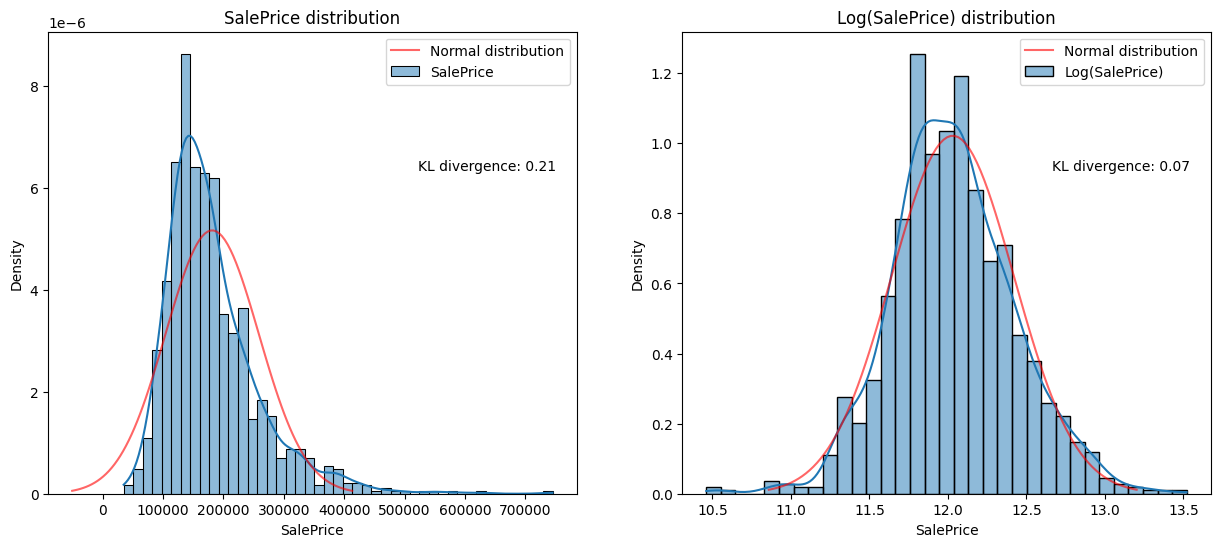

In [52]:
# target variable

def kl_divergence(p, q): # Kullback-Leibler divergence
    return entropy(p, q)

p = np.histogram(train_df['SalePrice'], bins=100, density=True)[0]
norm_dist = norm(loc=np.mean(train_df['SalePrice']), scale=np.std(train_df['SalePrice']))
q = norm_dist.pdf(np.histogram(train_df['SalePrice'], bins=100)[1][:-1])
kl_div_norm = kl_divergence(p, q)

p = np.histogram(np.log1p(train_df['SalePrice']), bins=100, density=True)[0]
norm_dist = norm(loc=np.mean(np.log1p(train_df['SalePrice'])), scale=np.std(np.log1p(train_df['SalePrice'])))
q = norm_dist.pdf(np.histogram(np.log1p(train_df['SalePrice']), bins=100)[1][:-1])
kl_div_log = kl_divergence(p, q)


plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['SalePrice'], kde=True, stat='density', label = 'SalePrice')
mu, sigma = train_df['SalePrice'].mean(), train_df['SalePrice'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2)), color='r', label='Normal distribution', alpha=0.6)
plt.text(0.7, 0.7, f'KL divergence: {kl_div_norm:.2f}', transform=plt.gca().transAxes)
plt.title('SalePrice distribution')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(train_df['SalePrice']), kde=True, stat='density', label = 'Log(SalePrice)')
mu, sigma = np.log1p(train_df['SalePrice']).mean(), np.log1p(train_df['SalePrice']).std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2)), color='r', label='Normal distribution', alpha=0.6)
plt.text(0.7, 0.7, f'KL divergence: {kl_div_log:.2f}', transform=plt.gca().transAxes)
plt.title('Log(SalePrice) distribution')
plt.legend()
plt.show()

We can observe that the distribution is right skewed, this is logical, because the price is bounded by 0 (it can't be negative) but is not bounded by a maximum value. We can then apply a log transformation to the target variable to make it more normally distributed.Even thoug there's no price equal to 0, we apply log1p transformation as the price could be very close to 0 (or even 0 in theory?), so we avoid issues and at the same time we are consistent (we will apply always logp1).

We can clearly see that the distribution is more symmetric after the transformation, and this is quantitated by the KL divergence between the distributions and the normal distribution with the same mean and variance. (Kullback-Leibler divergence is a measure of divergence between two probability distributions, $D_{KL}(P||Q) = \sum_{x\in\mathcal{X}}P(x)\log\left(\frac{P(x)}{Q(x)}\right)$).

Let's apply the transformation.

In [53]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
val_df['SalePrice'] = np.log1p(val_df['SalePrice'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2272\2724110238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2272\2724110238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['SalePrice'] = np.log1p(val_df['SalePrice'])


**Now the covatiates**

Let's split the data into numerical and categorical data, and check the distributions of the numerical data.

In [54]:
num_features = train_df.drop(['Id', 'SalePrice'], axis = 1).select_dtypes(include=[np.number]).columns
for feat in num_features:
    print(f'{feat} type: ', train_df[feat].dtype, ' \n Feature description: \n', feature_description(feat))

MSSubClass type:  int64  
 Feature description: 
 MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES


LotFrontage type:  float64  
 Feature description: 
 LotFrontage: Linear feet of street connected to property


LotArea type:  int64  
 Feature description: 
 LotArea: Lot size in square feet

Street: Type of road access to property

    

In [55]:

num_qual_features = ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold']
num_cuant_features = [feat for feat in num_features if feat not in num_qual_features]
cat_features = list(train_df.select_dtypes(include=['object']).columns)

In [56]:
print('There are ', len(num_cuant_features), ' numerical cuantitative features')
print('There are ', len(num_qual_features), ' numerical qualitative features')
print('There are ', len(cat_features), ' categorical features')

There are  32  numerical cuantitative features
There are  4  numerical qualitative features
There are  42  categorical features


Boxplot of numerical features


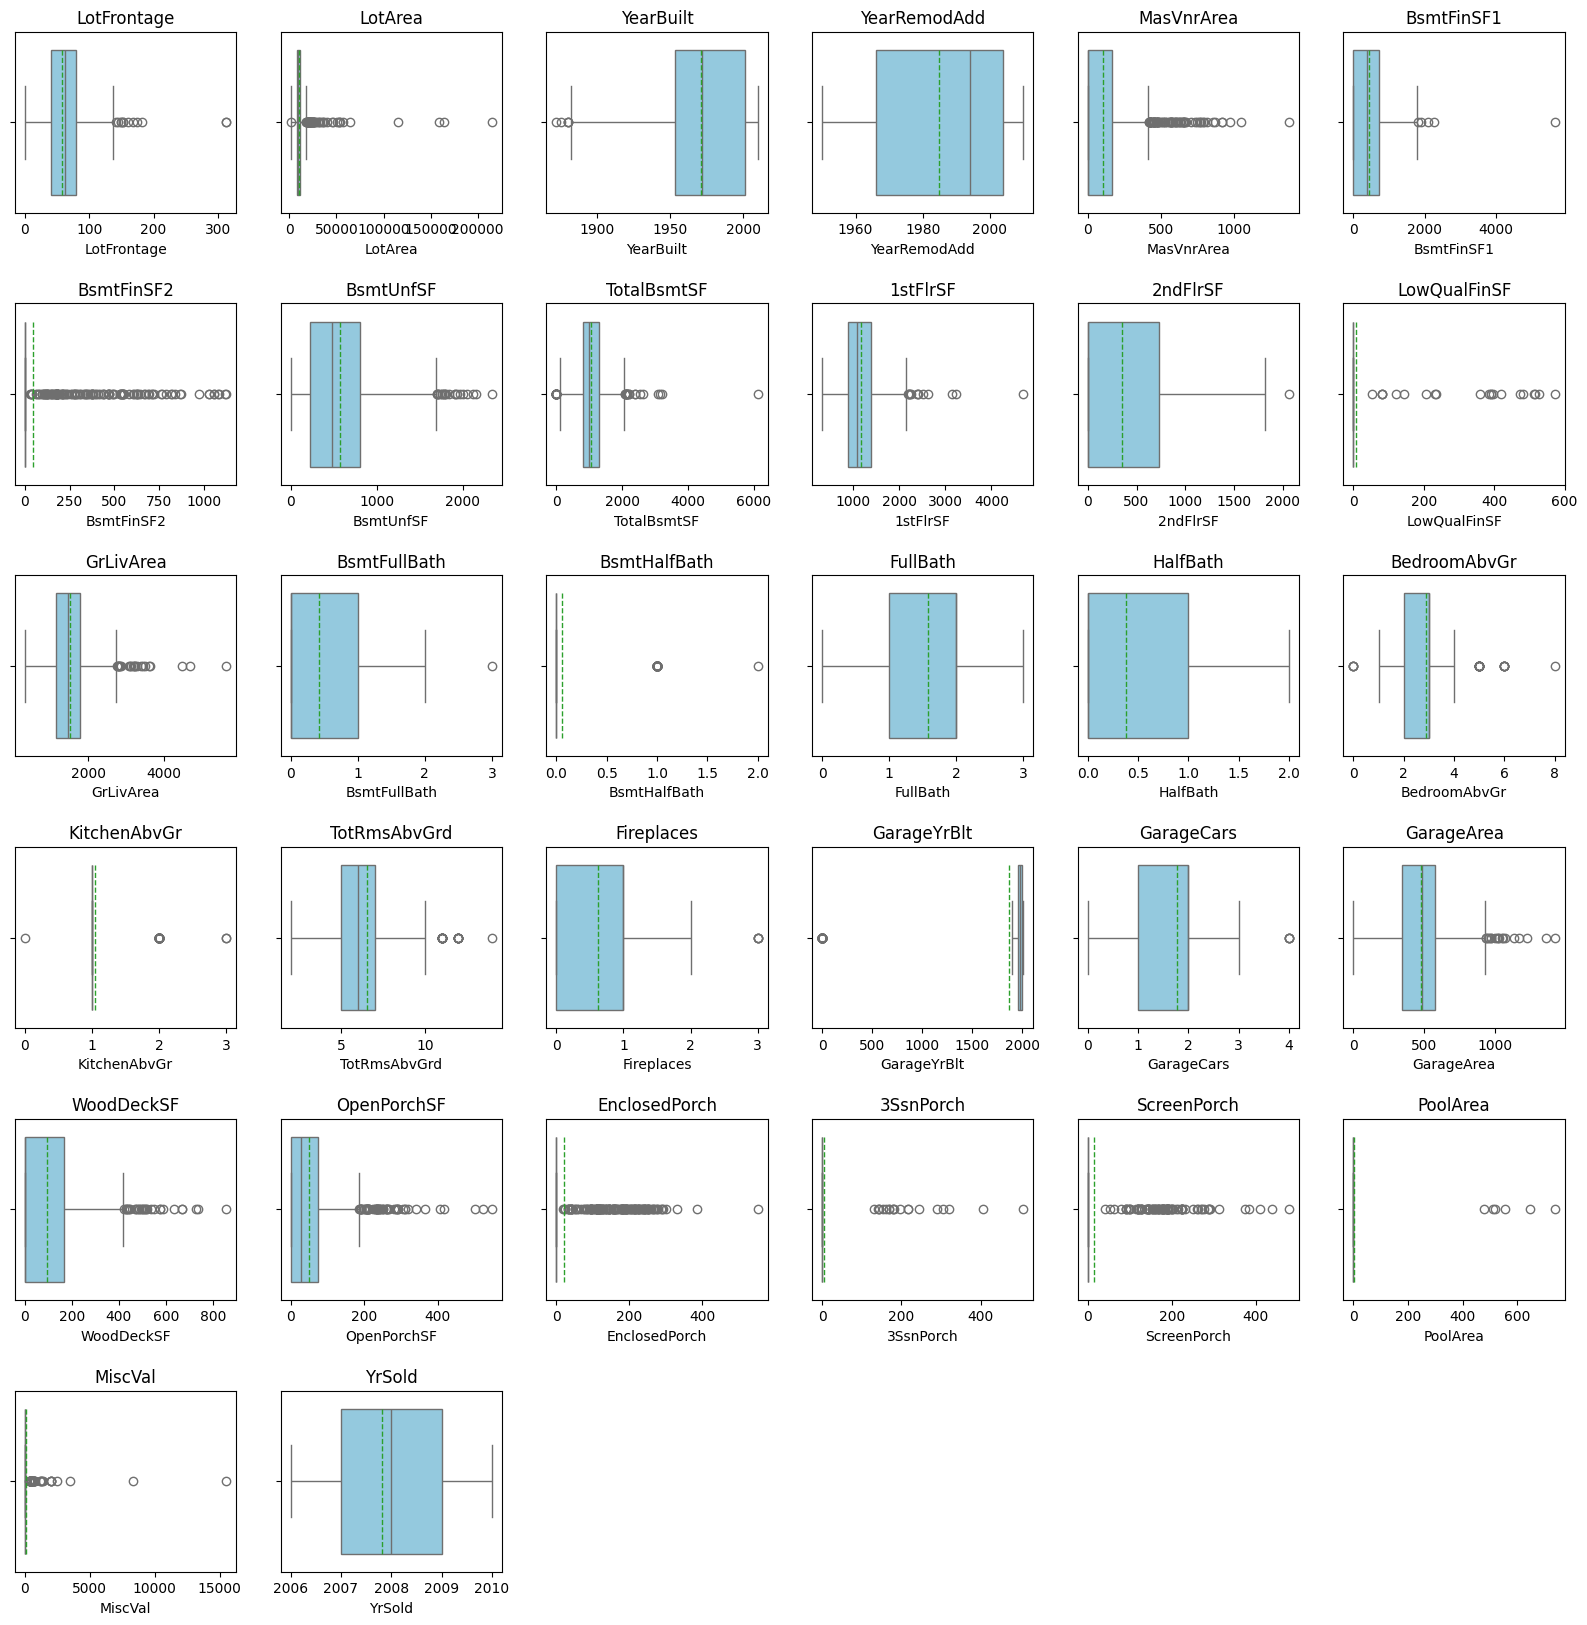

In [57]:
print('Boxplot of numerical features')


plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
for i, feat in enumerate(num_cuant_features):
    plt.subplot(6, 6, i+1)
    sns.boxplot(data=train_df, x=feat, color='skyblue', showmeans=True, meanline=True)
    plt.title(feat)
plt.show()

It's clear that there are outliers in the dataset, specially some variables.

We will not do much for now, but I don't like at all the fact that we introduce a bunch of outliers to the `GarageYrBlt` feature by introducing 0's. I hypothesise that this feature might not be really relevant, probably the garage capacity and quality are more important, so I'll just drop this feature.  

If necessary, we will come back to this, but some models, as tree based models, can handle outliers, so we will see.

In [58]:
train_df = train_df.drop('GarageYrBlt', axis=1)
test_df = test_df.drop('GarageYrBlt', axis=1)
val_df = val_df.drop('GarageYrBlt', axis = 1)
num_features = num_features.drop('GarageYrBlt')
num_cuant_features.remove('GarageYrBlt')

### 3.3 Transform the Covariates

By looking the boxplot below, we observe that as the target variable, there're some features that are skewed.

In [59]:
skewness = train_df[num_cuant_features].apply(lambda x: skew(x)).sort_values(ascending=False).to_frame().rename(columns={0: 'Skewness'})
skewed_feats = skewness.index[skewness['Skewness'] > 1] # Skewness threshold = 1
train_df_skewed = train_df.copy()
train_df_skewed[skewed_feats] = np.log1p(train_df_skewed[skewed_feats])
val_df_skewed = val_df.copy()
val_df_skewed[skewed_feats] = np.log1p(val_df_skewed[skewed_feats])
test_df_skewed = test_df.copy()
test_df_skewed[skewed_feats] = np.log1p(test_df_skewed[skewed_feats])
skewness

,Skewness
MiscVal,22.025247
PoolArea,14.377604
LotArea,11.942726
3SsnPorch,9.821277
LowQualFinSF,9.187637
KitchenAbvGr,4.439345
BsmtFinSF2,4.212476
ScreenPorch,4.085138
BsmtHalfBath,4.000640
EnclosedPorch,3.159881


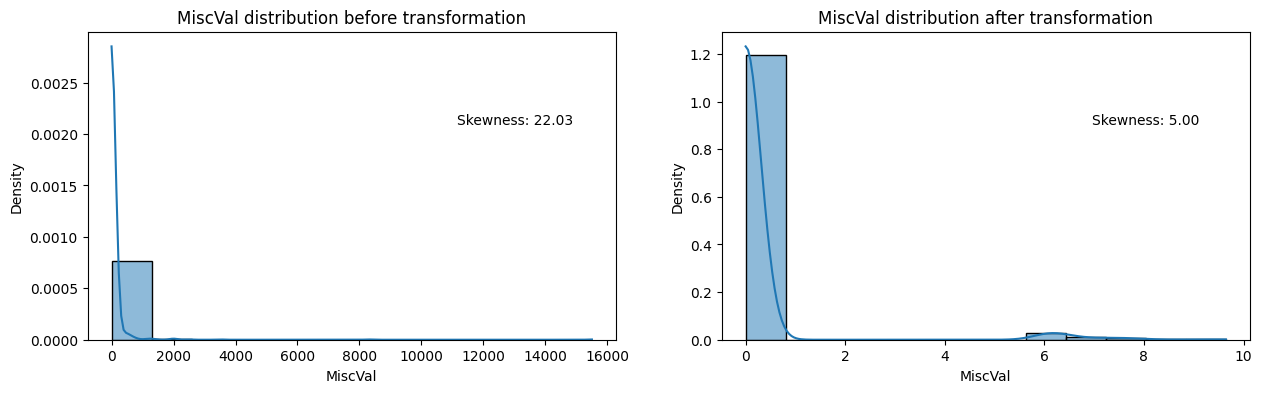

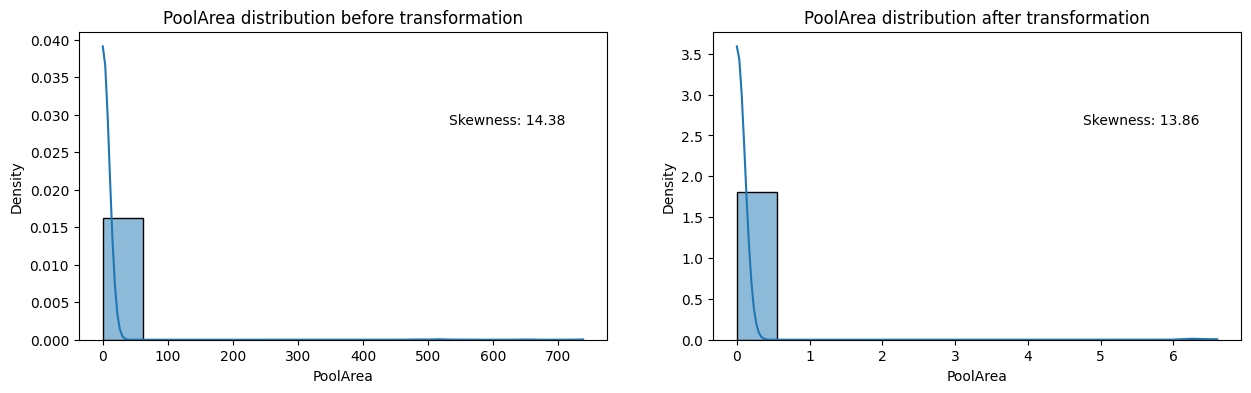

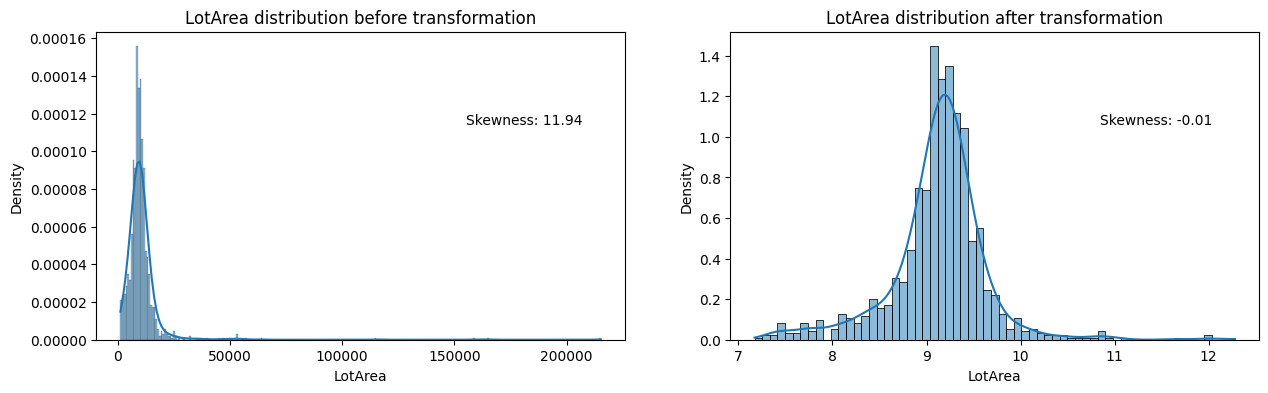

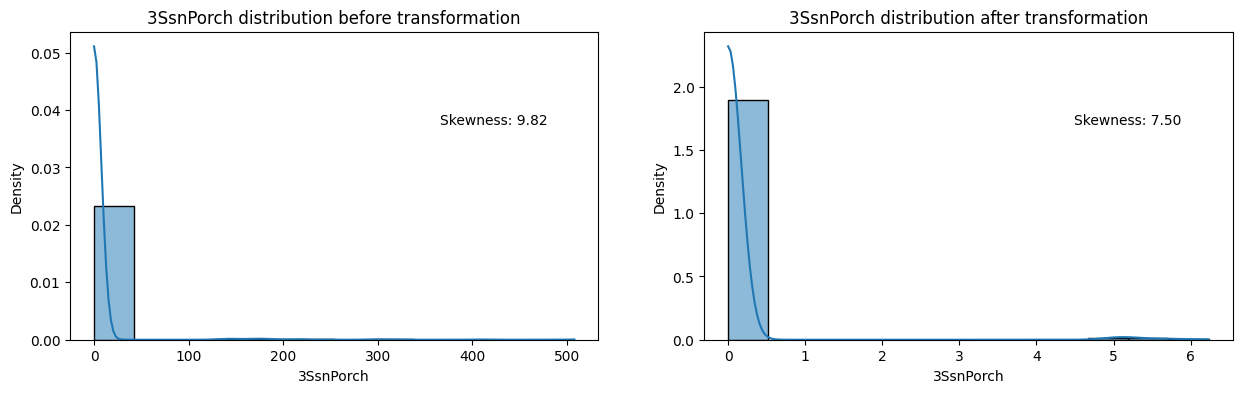

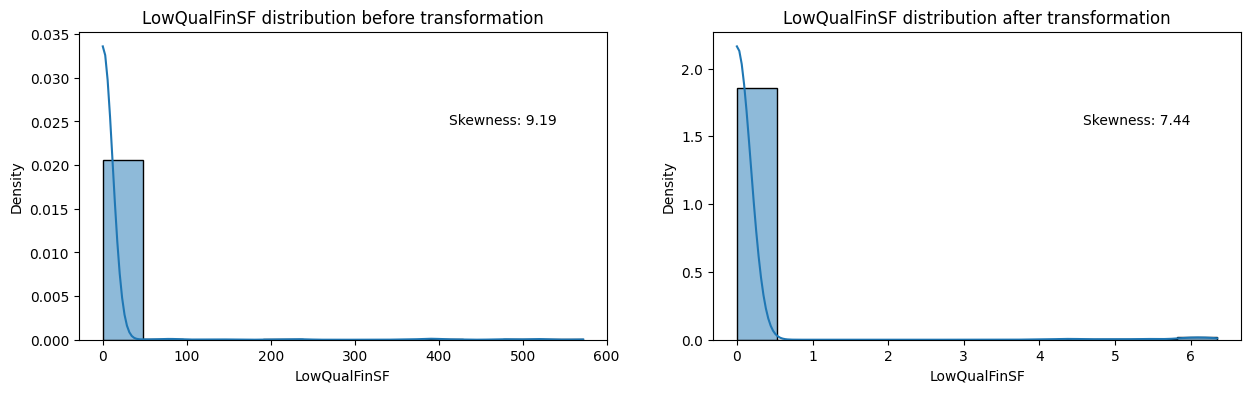

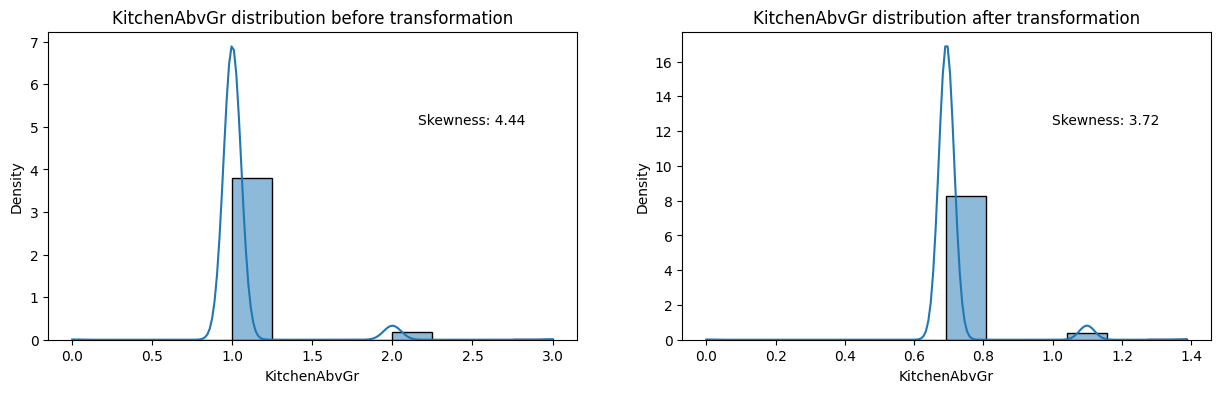

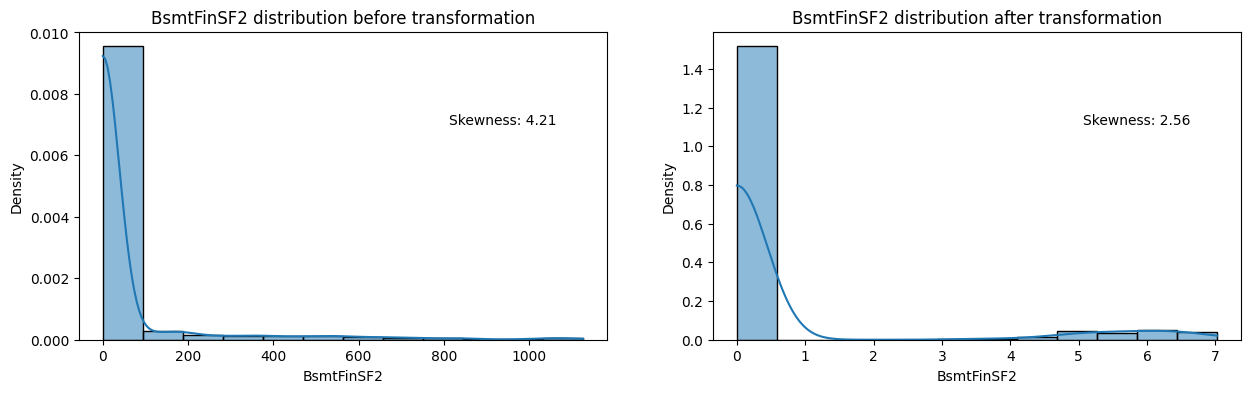

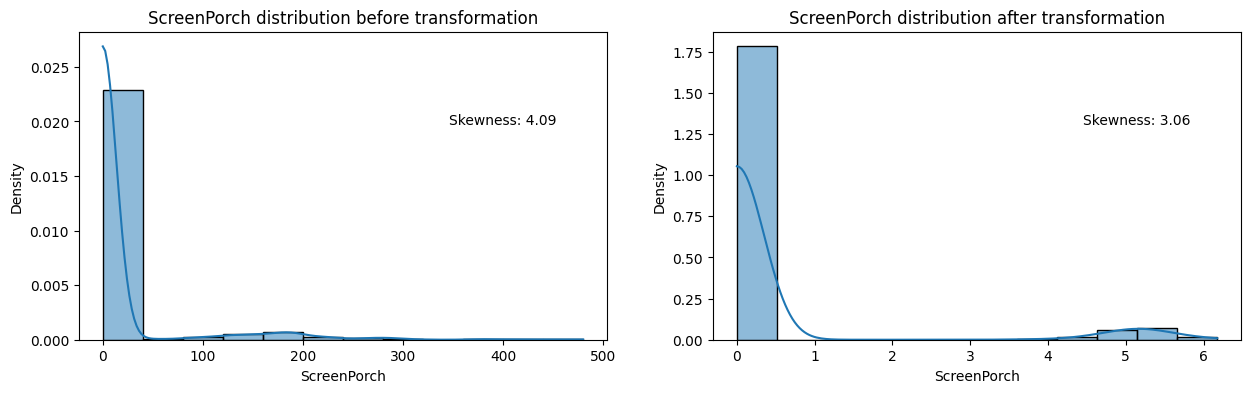

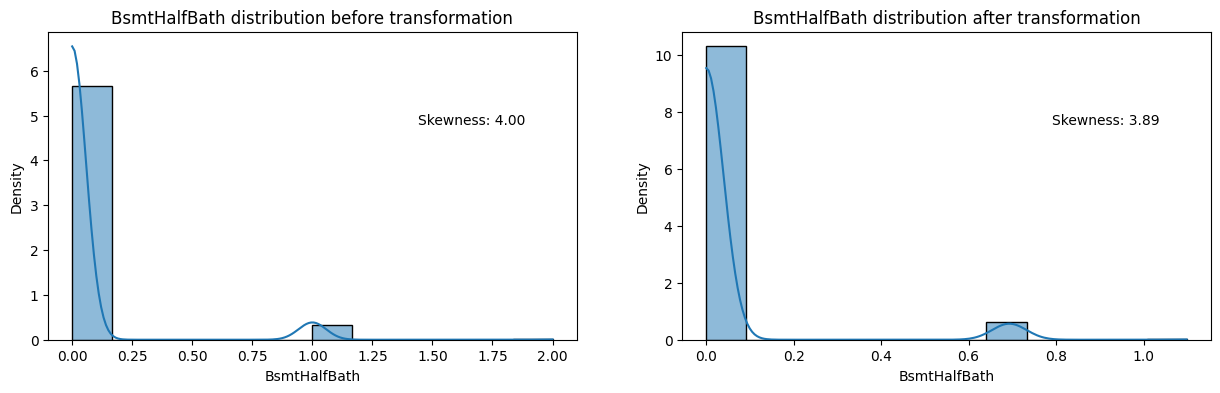

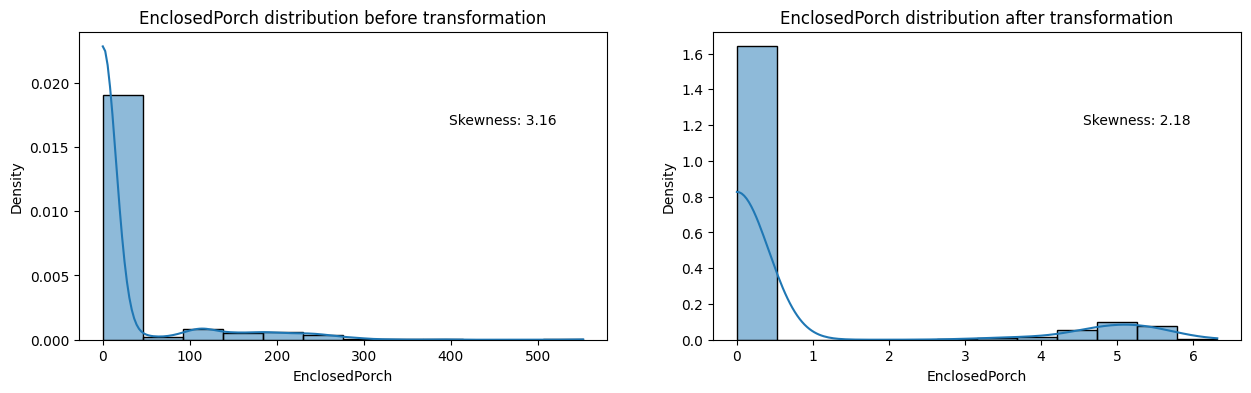

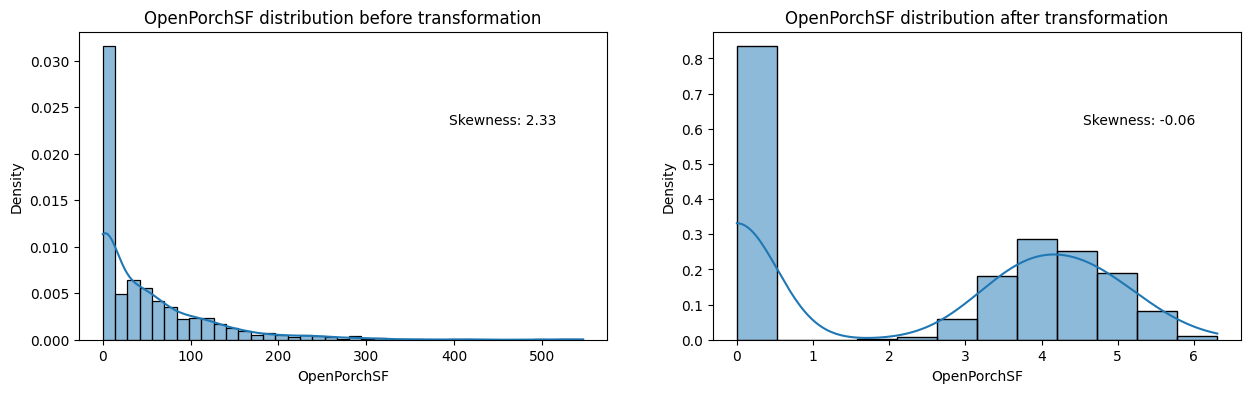

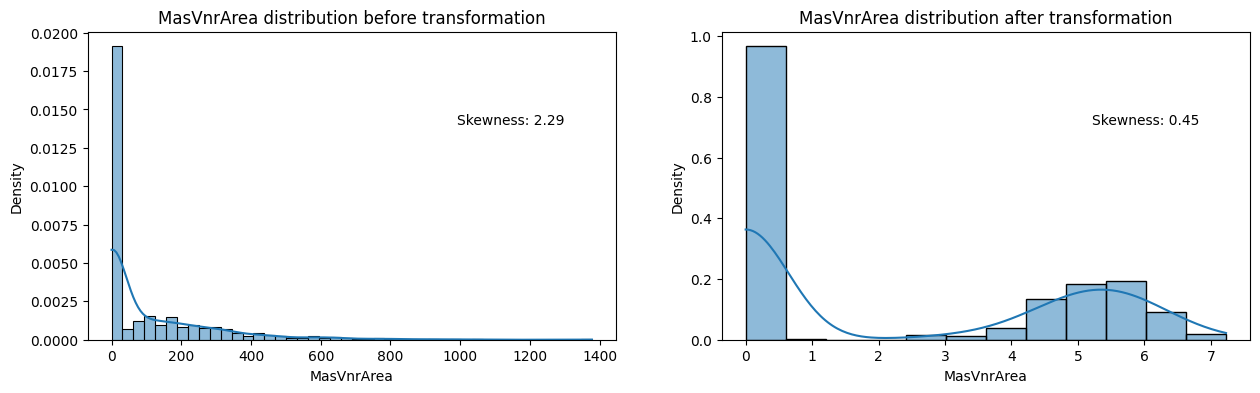

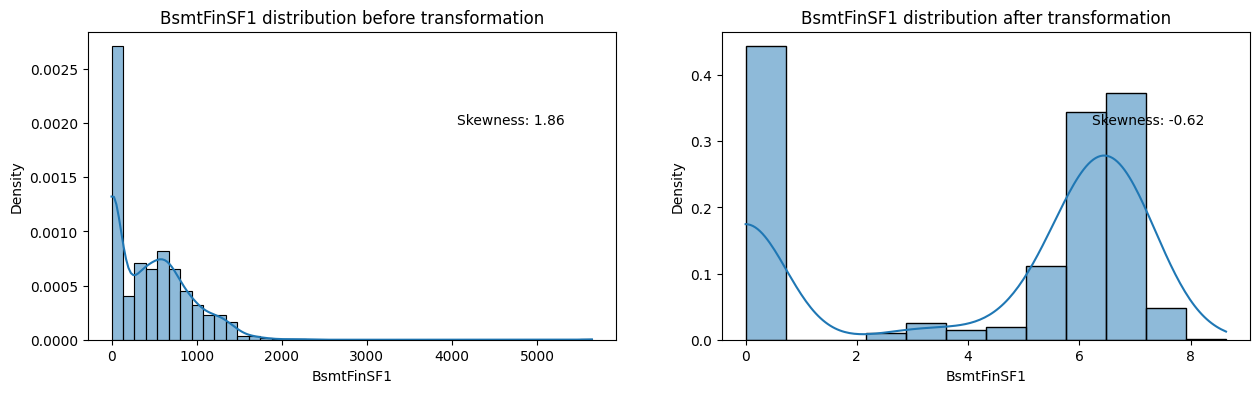

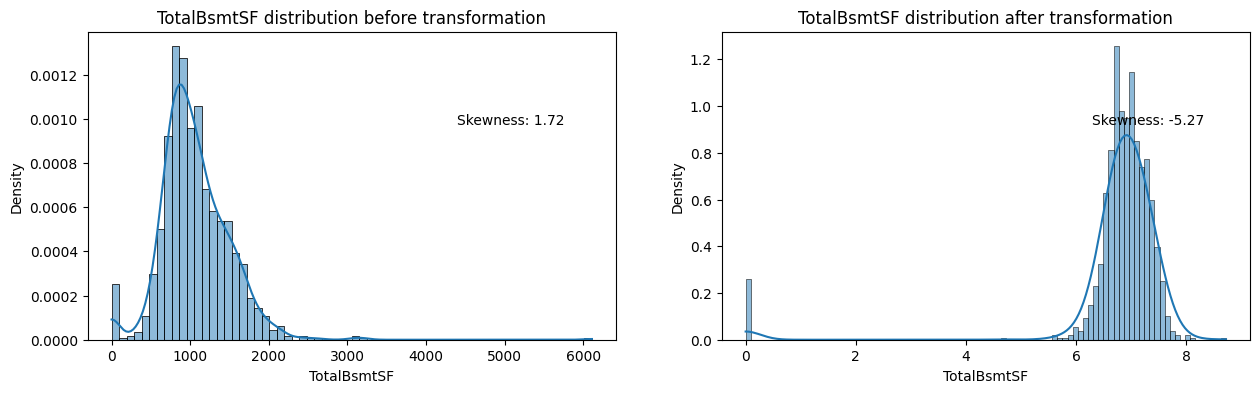

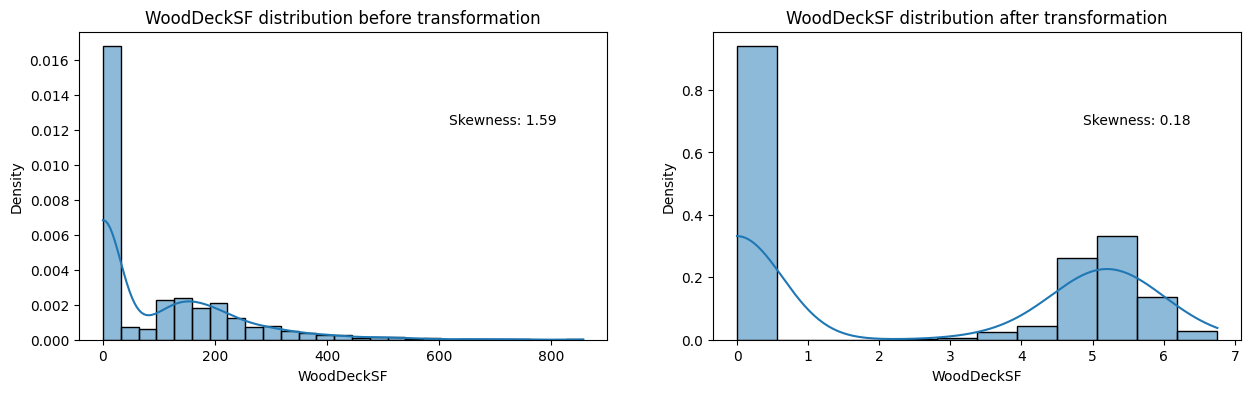

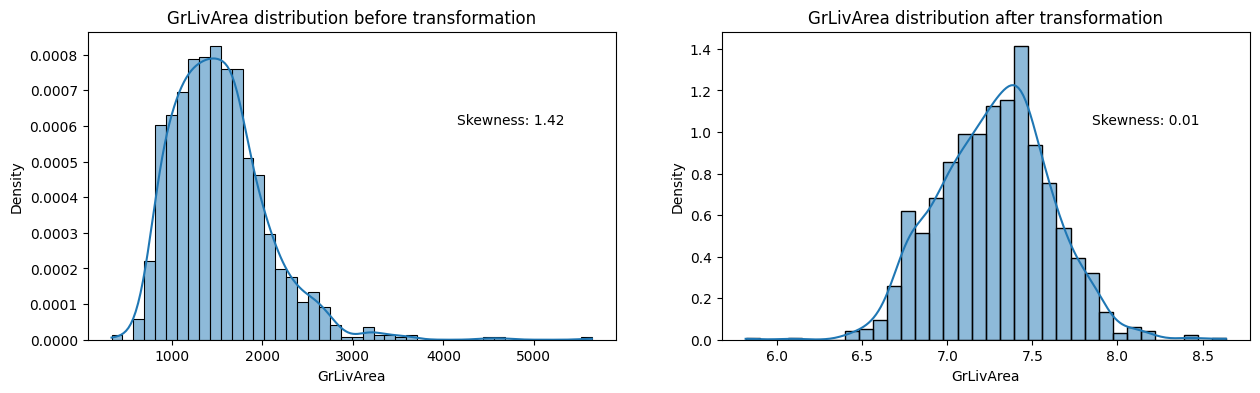

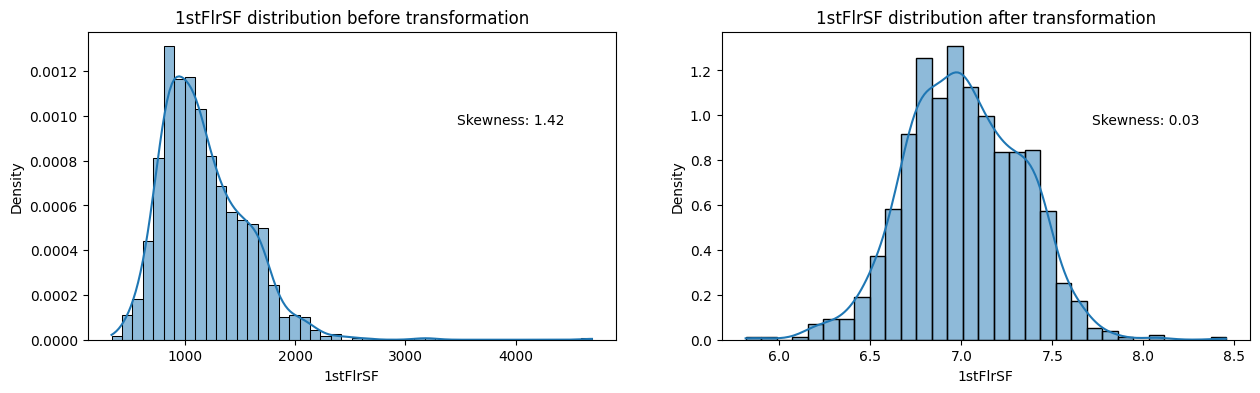

In [60]:
# Plot the distribution of the skewed features bedore and after the transformation

for feat in skewed_feats:
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[feat], kde=True, stat='density', label = feat)
    plt.text(0.7, 0.7, f'Skewness: {skew(train_df[feat]):.2f}', transform=plt.gca().transAxes)
    plt.title(feat + ' distribution before transformation')
    plt.subplot(1, 2, 2)
    sns.histplot(train_df_skewed[feat], kde=True, stat='density', label = feat)
    plt.text(0.7, 0.7, f'Skewness: {skew(train_df_skewed[feat]):.2f}', transform=plt.gca().transAxes)
    plt.title(feat + ' distribution after transformation')
    plt.show()


To some covariates, there's not a big difference, but to some others yess. This transofrmation should not affect the information of those covariates where we don't see a big difference. We note also, that to the case of `TotalBsmtSF`, the transformation made it more skewed, let's undo it.

In [61]:
train_df_skewed['TotalBsmtSF'] = train_df['TotalBsmtSF']
val_df_skewed['TotalBsmtSF'] = val_df['TotalBsmtSF']
test_df_skewed['TotalBsmtSF'] = test_df['TotalBsmtSF']


**Outliers**

In [62]:
# Redefine skewed_feats
skewness = train_df_skewed[num_cuant_features].apply(lambda x: skew(x)).sort_values(ascending=False).to_frame().rename(columns={0: 'Skewness'})
skewed_feats = skewness.index[abs(skewness['Skewness']) > 0.5] # Skewness threshold = 0.5
skewed_feats

Index(['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath',
       'KitchenAbvGr', 'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch',
       'TotalBsmtSF', 'BsmtUnfSF', '2ndFlrSF', 'TotRmsAbvGrd', 'HalfBath',
       'Fireplaces', 'BsmtFullBath', 'YearRemodAdd', 'BsmtFinSF1',
       'YearBuilt'],
      dtype='object')

How we still have skewed distributions, we will apply the Interquartile Range (IQR) method to detect outliers, and we will remove them. We will remove the outliers from the training dataset.

**Remark:** We will do it only fot the numerical and continous data, it doesn't make sense for
 - IQR:
    - $Q1 = 25\%$ percentile.
    - $Q3 = 75\%$ percentile.
    - $lower\_limit = Q1 - 1.5 \times IQR$
    - $upper\_limit = Q3 + 1.5 \times IQR$

In [63]:
def iqr_limits(df, feat):
    q1 = df[feat].quantile(0.25)
    q3 = df[feat].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    return lower_limit, upper_limit

outliers = {}
for feat in num_cuant_features:
    lower_limit, upper_limit = iqr_limits(train_df_skewed, feat)
    outliers[feat] = train_df_skewed[(train_df_skewed[feat] < lower_limit) | (train_df_skewed[feat] > upper_limit)]

print('Number of outliers:' , sum([len(outliers[feat]) for feat in outliers]))
print('Number of samples in trainning dataset:', train_df_skewed.shape[0])
print('Number of outliers per feature:' , {feat: len(outliers[feat]) for feat in outliers})


Number of outliers: 881
Number of samples in trainning dataset: 1168
Number of outliers per feature: {'LotFrontage': 12, 'LotArea': 103, 'YearBuilt': 5, 'YearRemodAdd': 0, 'MasVnrArea': 0, 'BsmtFinSF1': 0, 'BsmtFinSF2': 131, 'BsmtUnfSF': 21, 'TotalBsmtSF': 47, '1stFlrSF': 6, '2ndFlrSF': 1, 'LowQualFinSF': 21, 'GrLivArea': 7, 'BsmtFullBath': 1, 'BsmtHalfBath': 66, 'FullBath': 0, 'HalfBath': 0, 'BedroomAbvGr': 26, 'KitchenAbvGr': 56, 'TotRmsAbvGrd': 25, 'Fireplaces': 4, 'GarageCars': 4, 'GarageArea': 18, 'WoodDeckSF': 0, 'OpenPorchSF': 0, 'EnclosedPorch': 160, '3SsnPorch': 20, 'ScreenPorch': 97, 'PoolArea': 6, 'MiscVal': 44, 'YrSold': 0}


There's a lot of outliers to remove all. Let's check `EnclosedPorch`.

EnclosedPorch: Enclosed porch area in square feet




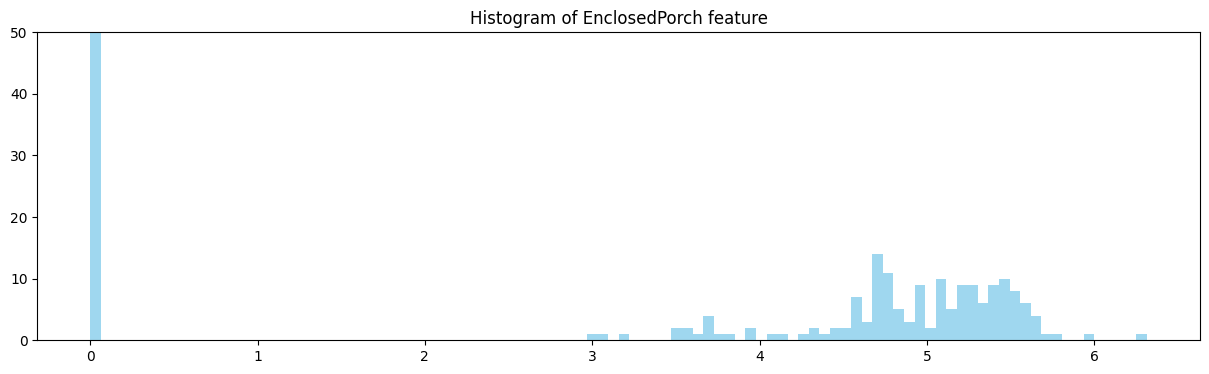

In [64]:
print(feature_description('EnclosedPorch'))

plt.figure(figsize=(15,4))
plt.hist(train_df_skewed['EnclosedPorch'], bins=100, color='skyblue', alpha = 0.8)
plt.title("Histogram of EnclosedPorch feature")
plt.ylim(0,50)
plt.show()

What happen here, is that most of the houses doesn't have a Enclosed Porch section, then the distribution is partitioned in two. We will simplify all the Porch information in a single feature `TotalPorchAreaSF` and then binarize the others porch related features.

OpenPorchSF: Open porch area in square feet




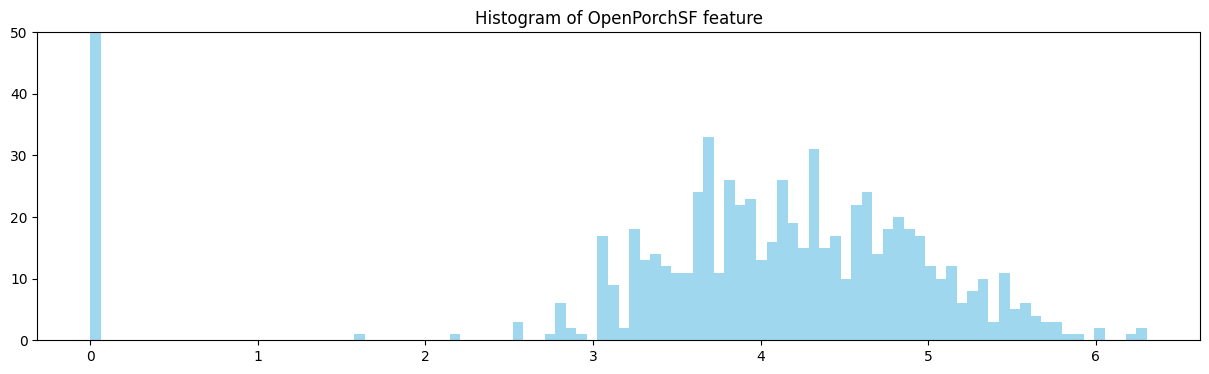

EnclosedPorch: Enclosed porch area in square feet




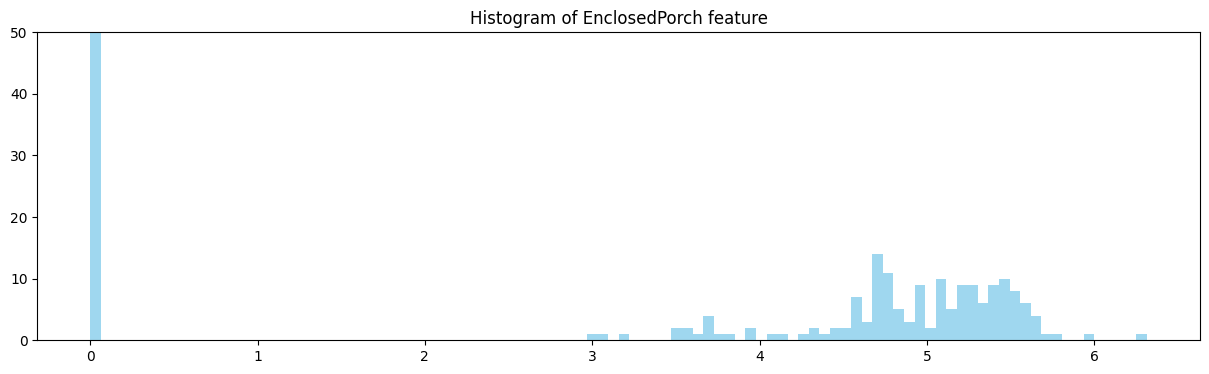

3SsnPorch: Three season porch area in square feet




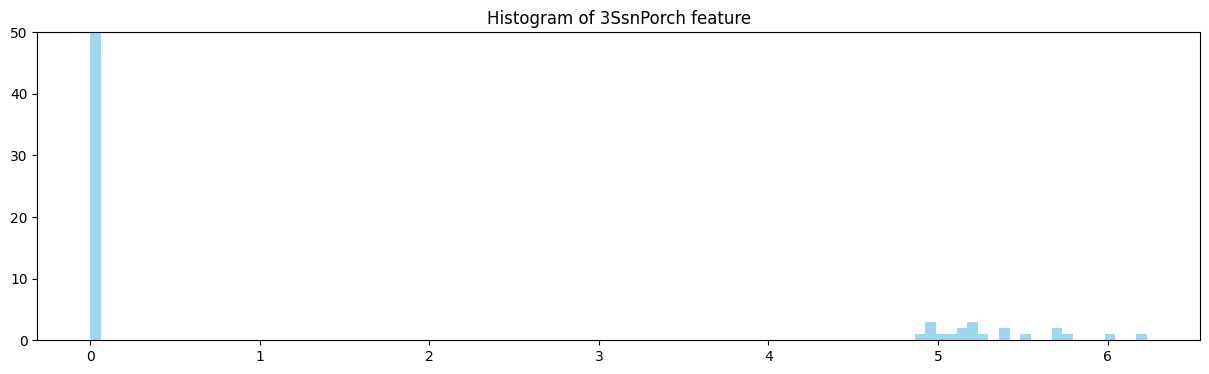

ScreenPorch: Screen porch area in square feet




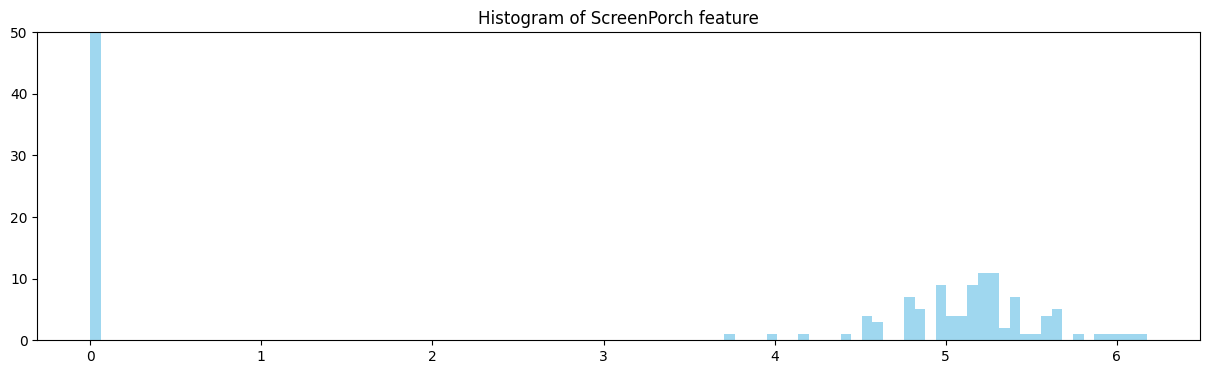

In [65]:
porch_feats = [feat for feat in num_features if 'Porch' in feature_description(feat)]

for feat in porch_feats[1:]:
    print(feature_description(feat))
    plt.figure(figsize=(15,4))
    plt.hist(train_df_skewed[feat], bins=100, color='skyblue', alpha = 0.8)
    plt.title(f"Histogram of {feat} feature")
    plt.ylim(0,50)
    plt.show()

In [66]:
train_df_skewed['TotalPorchAreaSF'] = train_df_skewed['OpenPorchSF'] + train_df_skewed['EnclosedPorch'] + train_df_skewed['3SsnPorch'] + train_df_skewed['ScreenPorch']
test_df_skewed['TotalPorchAreaSF'] = test_df_skewed['OpenPorchSF'] + test_df_skewed['EnclosedPorch'] + test_df_skewed['3SsnPorch'] + test_df_skewed['ScreenPorch']
val_df_skewed['TotalPorchAreaSF'] = val_df_skewed['OpenPorchSF'] + val_df_skewed['EnclosedPorch'] + val_df_skewed['3SsnPorch'] + val_df_skewed['ScreenPorch']

train_df_skewed['OpenPorch'] = train_df_skewed['OpenPorchSF']>0.0
test_df_skewed['OpenPorch'] = test_df_skewed['OpenPorchSF']>0.0
val_df_skewed['OpenPorch'] = val_df_skewed['OpenPorchSF']>0.0

train_df_skewed['EnclosedPorch'] = train_df_skewed['EnclosedPorch']>0.0
test_df_skewed['EnclosedPorch'] = test_df_skewed['EnclosedPorch']>0.0
val_df_skewed['EnclosedPorch'] = val_df_skewed['EnclosedPorch']>0.0

train_df_skewed['3SsnPorch'] = train_df_skewed['3SsnPorch']>0.0
test_df_skewed['3SsnPorch'] = test_df_skewed['3SsnPorch']>0.0
val_df_skewed['3SsnPorch'] = val_df_skewed['3SsnPorch']>0.0

train_df_skewed['ScreenPorch'] = train_df_skewed['ScreenPorch']>0.0
test_df_skewed['ScreenPorch'] = test_df_skewed['ScreenPorch']>0.0
val_df_skewed['ScreenPorch'] = val_df_skewed['ScreenPorch']>0.0

train_df_skewed = train_df_skewed.drop('OpenPorchSF', axis=1)
test_df_skewed = test_df_skewed.drop('OpenPorchSF', axis=1)
val_df_skewed = val_df_skewed.drop('OpenPorchSF', axis=1)


num_cuant_features.append('TotalPorchAreaSF')
num_cuant_features.remove('OpenPorchSF')
num_cuant_features.remove('EnclosedPorch')
num_cuant_features.remove('3SsnPorch')
num_cuant_features.remove('ScreenPorch')
num_features = num_features.drop('OpenPorchSF')
cat_features.append('OpenPorch')
cat_features.append('EnclosedPorch')
cat_features.append('3SsnPorch')
cat_features.append('ScreenPorch')


Probably, the Screen porch area was already contempled in the EnclosedPorch Area, but it doesn't change much anyway.

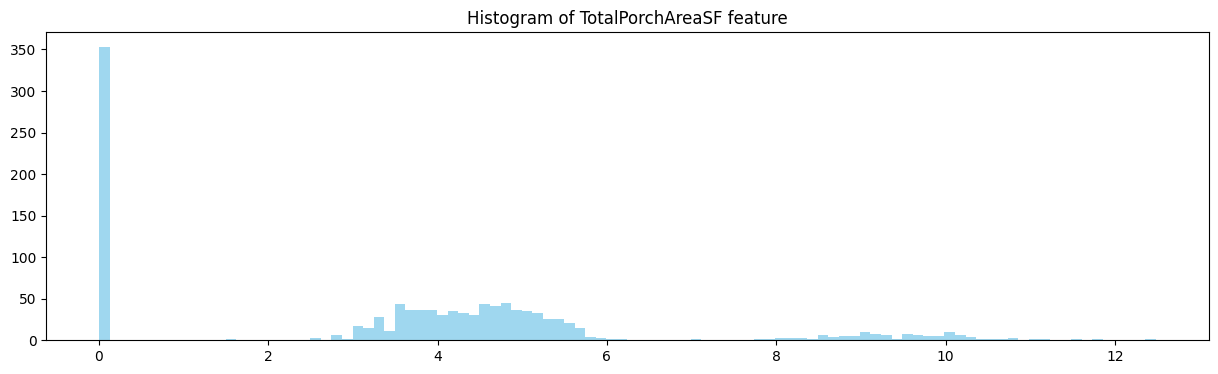

In [67]:
plt.figure(figsize=(15,4))
plt.hist(train_df_skewed['TotalPorchAreaSF'], bins=100, color='skyblue', alpha = 0.8)
plt.title("Histogram of TotalPorchAreaSF feature")
plt.show()

It's better that way, and we only have one feature like this, and not 4.

In [68]:
# reorder the datasts (SalesPrice at the end)

train_df_skewed = train_df_skewed[[col for col in train_df_skewed if col != 'SalePrice'] + ['SalePrice']]
val_df_skewed = val_df_skewed[[col for col in val_df_skewed if col != 'SalePrice'] + ['SalePrice']]
test_df_skewed = test_df_skewed[[col for col in test_df_skewed if col != 'SalePrice']]


### 3.2 Feature Importance

Now, we will study the importance of the features in the dataset.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2272\2323530350.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df_skewed.drop('Id', axis=1).corr()


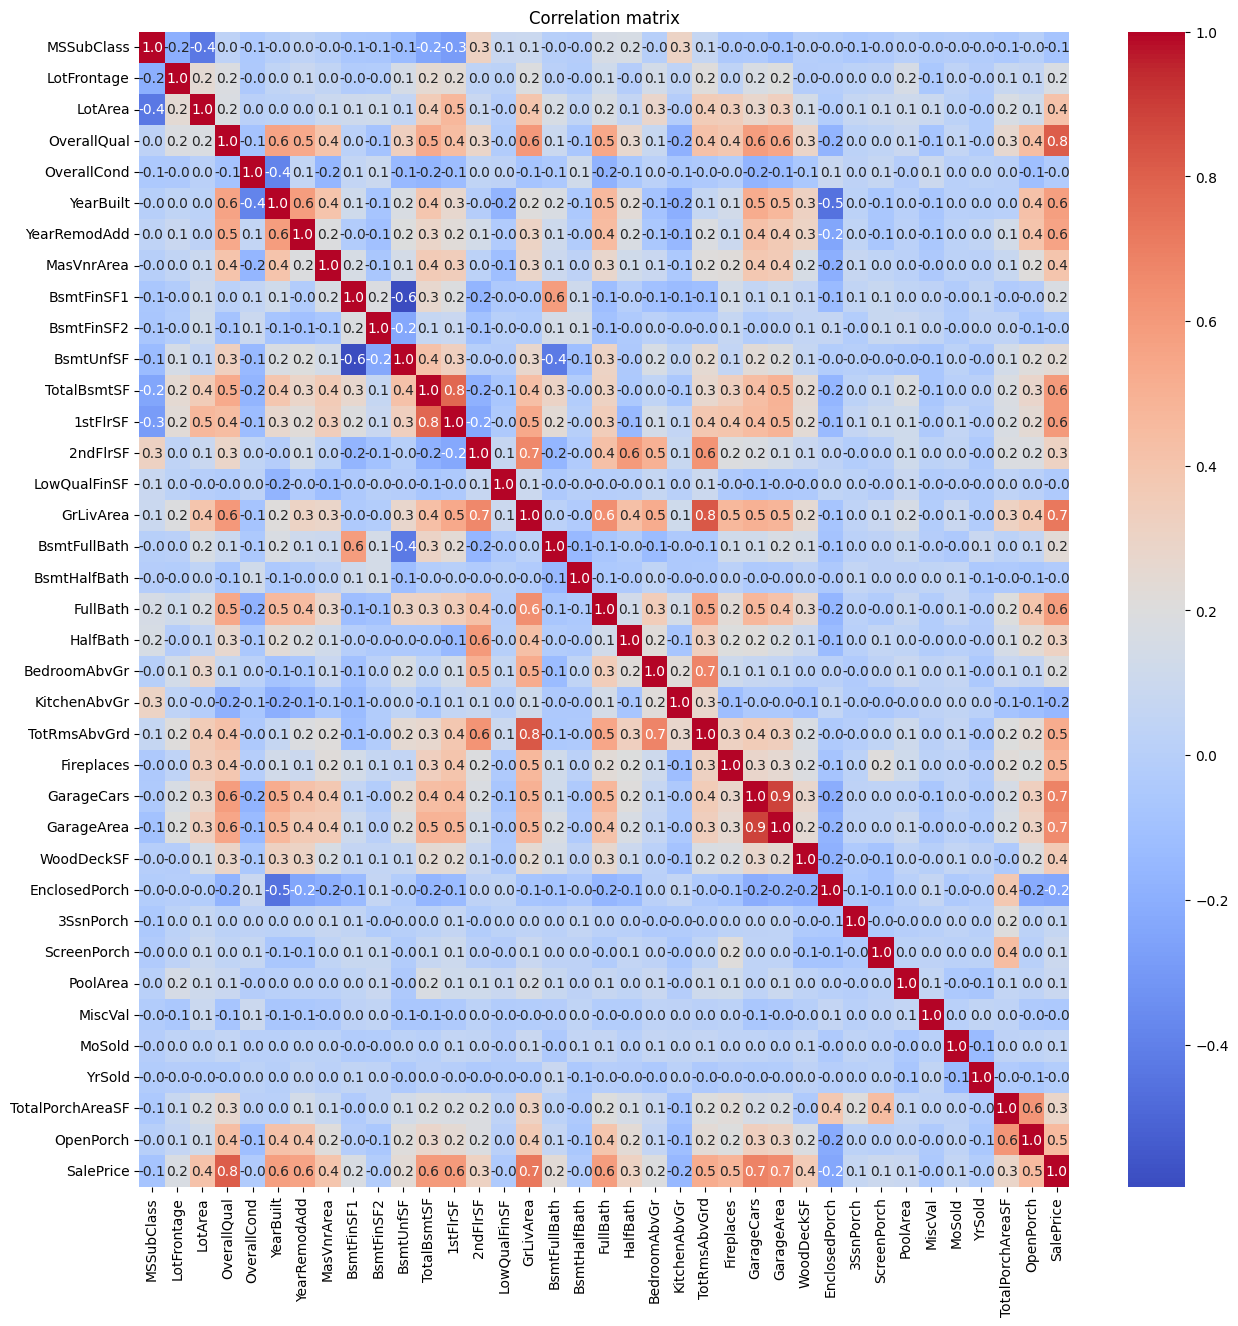

In [69]:
# Correlation matrix
corr_matrix = train_df_skewed.drop('Id', axis=1).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation matrix')
plt.show()



The basement features are confusing even to me, that I get to read the description of the features, I will drop `BsmtFinSF2` and `BsmtFinSF1` and create a new `BsmtFinSF` = `BsmtFinSF2` + `BsmtFinSF1`.

In [70]:
train_df_skewed['BsmtFinSF'] = train_df_skewed['BsmtFinSF1'] + train_df_skewed['BsmtFinSF2']
val_df_skewed['BsmtFinSF'] = val_df_skewed['BsmtFinSF1'] + val_df_skewed['BsmtFinSF2']
test_df_skewed['BsmtFinSF'] = test_df_skewed['BsmtFinSF1'] + test_df_skewed['BsmtFinSF2']

train_df_skewed.drop(['BsmtFinSF1', 'BsmtFinSF2'], axis=1, inplace=True)
val_df_skewed.drop(['BsmtFinSF1', 'BsmtFinSF2'], axis=1, inplace=True)
test_df_skewed.drop(['BsmtFinSF1', 'BsmtFinSF2'], axis=1, inplace=True)

num_cuant_features.remove('BsmtFinSF1')
num_cuant_features.remove('BsmtFinSF2')
num_cuant_features.append('BsmtFinSF')

In [71]:
# Convert the categorical features to numerical
train_df_skewed['BsmtFinType1'] = train_df_skewed['BsmtFinType1'].map({'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
val_df_skewed['BsmtFinType1'] = val_df_skewed['BsmtFinType1'].map({'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
test_df_skewed['BsmtFinType1'] = test_df_skewed['BsmtFinType1'].map({'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

train_df_skewed['BsmtFinType2'] = train_df_skewed['BsmtFinType2'].map({'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
val_df_skewed['BsmtFinType2'] = val_df_skewed['BsmtFinType2'].map({'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
test_df_skewed['BsmtFinType2'] = test_df_skewed['BsmtFinType2'].map({'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

# Only one quality feature
train_df_skewed['BsmtFinType'] = train_df_skewed[['BsmtFinType1', 'BsmtFinType2']].mean(axis=1).astype(np.int64)
train_df_skewed.drop(['BsmtFinType1', 'BsmtFinType2'], axis=1, inplace=True)
val_df_skewed['BsmtFinType'] = val_df_skewed[['BsmtFinType1', 'BsmtFinType2']].mean(axis=1).astype(np.int64)
val_df_skewed.drop(['BsmtFinType1', 'BsmtFinType2'], axis=1, inplace=True)
test_df_skewed['BsmtFinType'] = test_df_skewed[['BsmtFinType1', 'BsmtFinType2']].mean(axis=1).astype(np.int64)
test_df_skewed.drop(['BsmtFinType1', 'BsmtFinType2'], axis=1, inplace=True)
train_df_skewed['BsmtFinType'].value_counts()


cat_features.remove('BsmtFinType1')
cat_features.remove('BsmtFinType2')
num_qual_features.append('BsmtFinType')

We can see some covariates that are highly correlated with the target variable, and some that are highly correlated with each other, which is spected, for example, 'GarageCars' and 'GarageArea', or 'TotRmsAbvGrd' and 'GrLivArea'. Let's first analyse the correlation with the target variable, for example 'OverallQual' is highly correlated, let's plot it.

In [72]:
X_train = train_df_skewed[['OverallQual']]
y_train = train_df_skewed['SalePrice']
X_val = val_df[['OverallQual']]
y_val = val_df['SalePrice']

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print('Mean squared error:', mse)
results = pd.DataFrame(columns=['Model', 'Parameters', 'MSE', 'MBE', 'R2'])
results = pd.concat([results, pd.DataFrame({'Model': 'Linear Regression Baseline', 'Parameters': 'OverallQual', 'MSE': mse,
                          'MBE': np.mean(y_val - y_pred), 'R2': r2_score(y_val, y_pred)}, index=[0])], ignore_index=True)
results

Mean squared error: 0.053404135990338865


,Model,Parameters,MSE,MBE,R2
0,Linear Regression Baseline,OverallQual,0.053404,-0.007321,0.713821


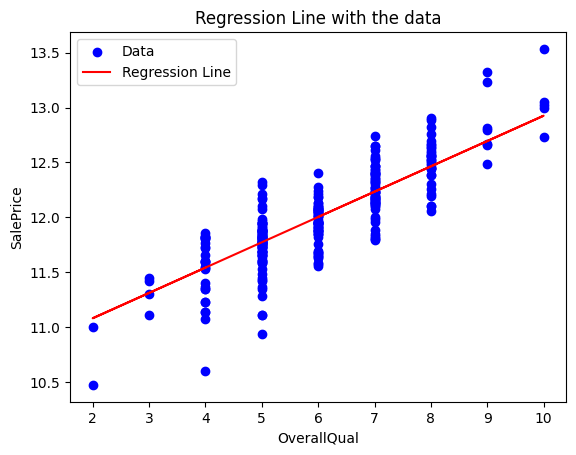

In [73]:
# Plot the regression line with the data
plt.figure()
plt.scatter(X_val, y_val, color='blue', label='Data')
plt.plot(X_val, model.coef_ * X_val + model.intercept_, color='red', label='Regression Line')
plt.title('Regression Line with the data')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend()
plt.show()




<font color=red> We should do better than this !!!

---

## 4.0 Preprocessing Pipeline
Let's build a pipeline for encoding the data, and then we will apply different models to the dataset.
Pipeline:
- Ordinal Encoding for ordinal features (Qual, Cond, etc).
- One-Hot Encoding for nominal features (Neighborhood, MSZoning, etc).
- RobustScaler for numerical cuantitative features. (To qualitative features doesn't make sense to apply a scaler).

In [74]:
for feat in cat_features:
    if feat != 'BsmtFinType' and feat != 'OpenPorch' and feat != 'EnclosedPorch' and feat != '3SsnPorch' and feat != 'ScreenPorch':
        print(f'{feat} type: ', train_df_skewed[feat].dtype, ' \n Feature description: \n', feature_description(feat))

ordinal_features = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                    'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']
nominal_features = [feat for feat in cat_features if feat not in ordinal_features]

MSZoning type:  object  
 Feature description: 
 MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	

Alley type:  object  
 Feature description: 
 Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		

LotShape type:  object  
 Feature description: 
 LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       

LandContour type:  object  
 Feature description: 
 LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		

We will create a list of possible categories for each feature, and we will apply the encoding.

In [75]:
test_df['SalePrice'] = -1

entire_df = pd.concat([train_df, val_df, test_df], axis=0, ignore_index=True)

In [76]:
# Create a list with all the possible values of the ordinal features
entire_df = pd.concat([train_df_skewed.drop('SalePrice', axis=1), val_df_skewed.drop('SalePrice', axis=1), test_df_skewed], axis=0, ignore_index=True)


ordinal_categories = []
for feat in ordinal_features:
    ordinal_categories.append(entire_df[feat].unique())

nominal_categories = []
for feat in nominal_features:
    nominal_categories.append(entire_df[feat].unique())

In [77]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, RobustScaler

print('Ordinal features:', ordinal_features)
print('Nominal features:', nominal_features)
print('Numerical cuantitative features:', num_cuant_features)
print('Numerical qualitative features:', num_qual_features)



pipeline = ColumnTransformer([ ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
                              ('nominal', OneHotEncoder(categories=nominal_categories), nominal_features),
                                ('numerical', RobustScaler(), num_cuant_features)], remainder='passthrough')




Ordinal features: ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']
Nominal features: ['MSZoning', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition', 'OpenPorch', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
Numerical cuantitative features: ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'MiscVal', 

---

## 5.0 Model selection

We will train several models:
- Linear Regression
- Lasso Regression (just because I think it could be interesting to see the effect of the L1 regularization alone in this case where we have a lot of features)
- ElasticNet:
    - Linear Reregression with both Lasso and Ridge Regularization
- Gradient Boosting Regressor
- Random Forest Regressor

In [78]:
X_train = train_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df_skewed['SalePrice']
X_val = val_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_val = val_df_skewed['SalePrice']
X_test = test_df_skewed.drop('Id', axis=1)

X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)
X_test = pipeline.transform(X_test)

print('X_train shape:', X_train.shape)



X_train shape: (1168, 222)


In [79]:
pipeline.get_feature_names_out()

array(['ordinal__LotShape', 'ordinal__LandContour', 'ordinal__Utilities',
       'ordinal__LandSlope', 'ordinal__ExterQual', 'ordinal__ExterCond',
       'ordinal__BsmtQual', 'ordinal__BsmtCond', 'ordinal__BsmtExposure',
       'ordinal__HeatingQC', 'ordinal__KitchenQual',
       'ordinal__Functional', 'ordinal__FireplaceQu',
       'ordinal__GarageFinish', 'ordinal__GarageQual',
       'ordinal__GarageCond', 'ordinal__PavedDrive', 'ordinal__PoolQC',
       'ordinal__Fence', 'nominal__MSZoning_RL', 'nominal__MSZoning_RM',
       'nominal__MSZoning_FV', 'nominal__MSZoning_RH',
       'nominal__MSZoning_C (all)', 'nominal__Alley_None',
       'nominal__Alley_Pave', 'nominal__Alley_Grvl',
       'nominal__LotConfig_Inside', 'nominal__LotConfig_Corner',
       'nominal__LotConfig_CulDSac', 'nominal__LotConfig_FR2',
       'nominal__LotConfig_FR3', 'nominal__Neighborhood_NAmes',
       'nominal__Neighborhood_Gilbert', 'nominal__Neighborhood_Edwards',
       'nominal__Neighborhood_SWISU', 'n

### 5.1 Linear Regression

In [80]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print('Mean squared error:', mse)


Mean squared error: 0.01598017371104765


In [81]:


results = pd.concat([results, pd.DataFrame({'Model': 'Linear Regression', 'Parameters': 'All features', 'MSE': mse,
                          'MBE': np.mean(y_val - y_pred), 'R2': r2_score(y_val, y_pred)}, index=[0])], ignore_index=True)
results

,Model,Parameters,MSE,MBE,R2
0,Linear Regression Baseline,OverallQual,0.053404,-0.007321,0.713821
1,Linear Regression,All features,0.015980,-0.002390,0.914366


In [82]:
model = LinearRegression()

# Concat train and val sets
X_train = np.concatenate((X_train, X_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)

model.fit(X_train, y_train)

best_model_LR = model

y_pred = model.predict(X_test)
y_test = np.expm1(y_pred)

In [83]:
# discard inf
y_test = y_test[~np.isinf(y_test)]



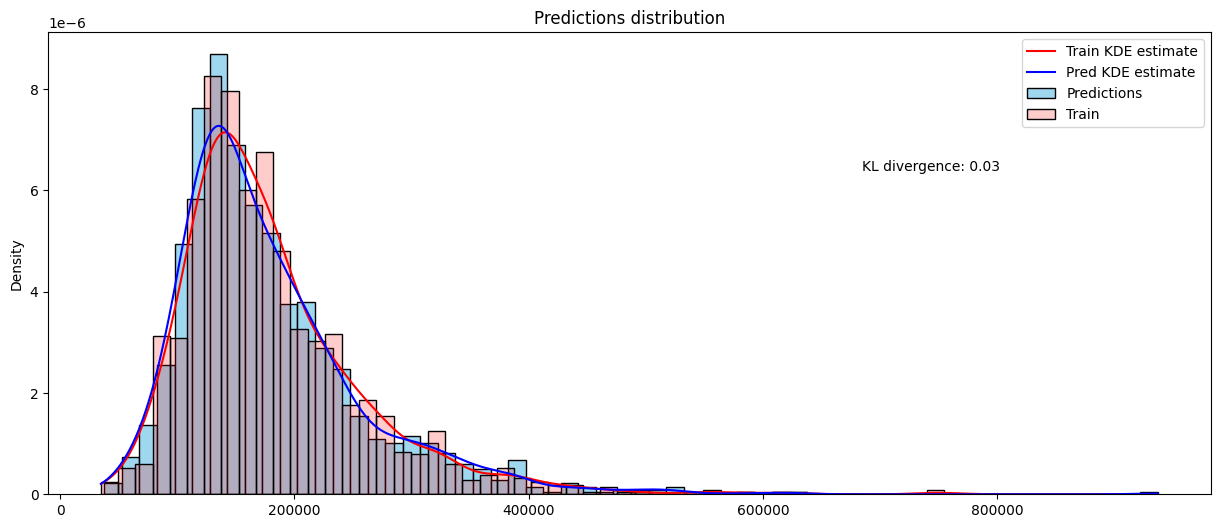

In [84]:
kde_train = stats.gaussian_kde(np.expm1(y_train))
kde_test = stats.gaussian_kde(y_test)

x = np.linspace(min(np.expm1(y_train).min(), y_test.min()), max(np.expm1(y_train).max(), y_test.max()), 1000)
kl_div = kl_divergence(kde_train(x), kde_test(x))

# Plot distribution of the predictions
plt.figure(figsize=(15, 6))
sns.histplot(y_test, stat='density', color='skyblue', label='Predictions', alpha = 0.8)
plt.plot(x, kde_train(x), color='red', label='Train KDE estimate')
plt.plot(x, kde_test(x), color='blue', label='Pred KDE estimate')
plt.text(0.7, 0.7, f'KL divergence: {kl_div:.2f}', transform=plt.gca().transAxes)
sns.histplot(np.expm1(y_train), stat='density', color='red', label='Train', alpha=0.2)
plt.title('Predictions distribution')
plt.legend()
plt.show()


We are already quite good. The predicted test distribuition is fairly similar to the train distribuition,so we are learning well from the data.

**Explainability: Feature Importance**

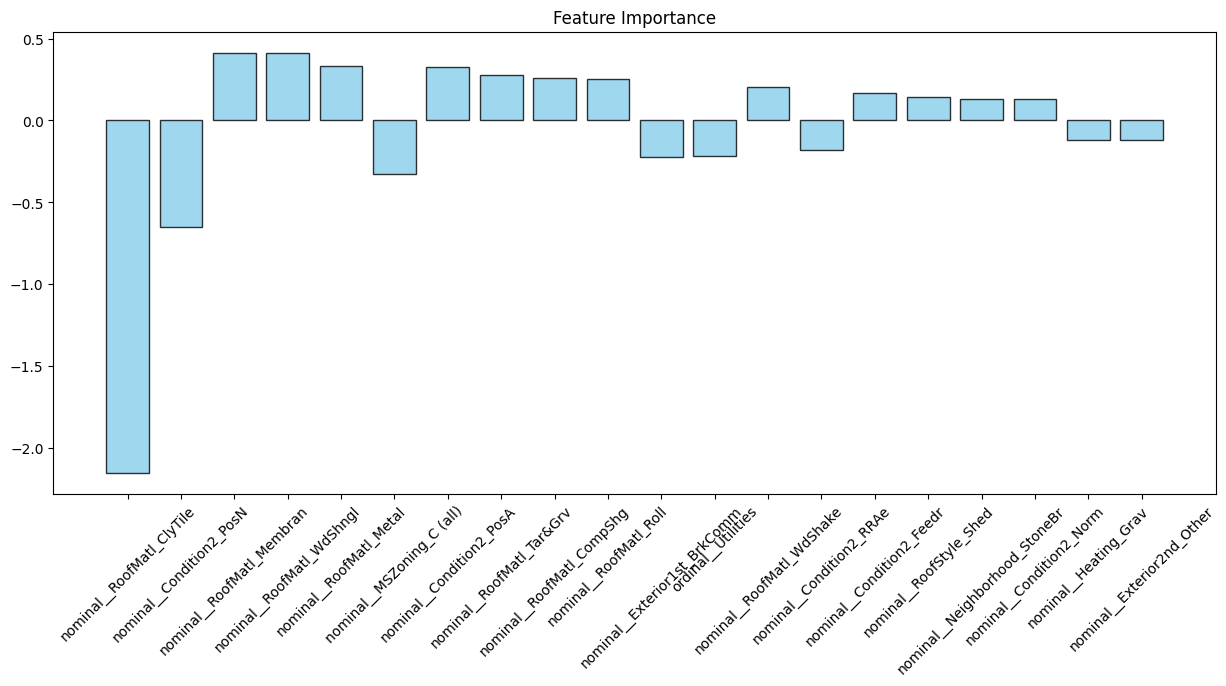

In [85]:
# Feature Importance
importances = model.coef_

# Get the feature names
feature_names = pipeline.get_feature_names_out()

# Order the features by importance
indices = np.argsort(np.abs(importances))[::-1]
feature_names = np.array(feature_names)
feature_names = feature_names[indices]
importances = importances[indices]

# Plot the first 20 features
plt.figure(figsize=(15, 6))
plt.bar(feature_names[:20], importances[:20], color='skyblue', alpha=0.8, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Feature Importance')
plt.show()



Apparently people care about the roof ?? Detest ClyTile, hard to keep clean I suppose :).

### 5.2 Linear Regression with Lasso Regularization

In [86]:
from sklearn.linear_model import LassoCV

X_train = train_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df_skewed['SalePrice']
X_val = val_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_val = val_df_skewed['SalePrice']
X_test = test_df_skewed.drop('Id', axis=1)

X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)
X_test = pipeline.transform(X_test)


model = LassoCV(cv=5, random_state=42, verbose=True, n_alphas=500, alphas = np.linspace(0.0001, 0.1, 1000))
model.fit(X_train, y_train)

model.alpha_


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0006000000000000001

In [87]:
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print('Mean squared error:', mse)

best_model_LR_Lasso = model


Mean squared error: 0.0164952215344978


In [88]:

results = pd.concat([results, pd.DataFrame({'Model': f'Lasso Regression', 'Parameters': f"alpha = {best_model_LR_Lasso.alpha_}", 'MSE': mse,
                          'MBE': np.mean(y_val - y_pred), 'R2': r2_score(y_val, y_pred)}, index=[0])], ignore_index=True)

results

,Model,Parameters,MSE,MBE,R2
0,Linear Regression Baseline,OverallQual,0.053404,-0.007321,0.713821
1,Linear Regression,All features,0.015980,-0.002390,0.914366
2,Lasso Regression,alpha = 0.0006000000000000001,0.016495,-0.002710,0.911606


### 5.2 Elastic Net

Elastic Net is just a combination of Lasso and Ridge. We will use the `ElasticNetCV` function from `sklearn` to find the best hyperparameters.


In [89]:
X_train = train_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df_skewed['SalePrice']
X_val = val_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_val = val_df_skewed['SalePrice']
X_test = test_df_skewed.drop('Id', axis=1)

X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)
X_test = pipeline.transform(X_test)


In [90]:
X_train = np.concatenate((X_train, X_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)


In [91]:
# ElasticNet
from sklearn.linear_model import ElasticNet

model = ElasticNet(random_state=42)
grid_search = GridSearchCV(model, param_grid={'alpha': np.linspace(0.0001, 0.1, 1000), 'l1_ratio': np.linspace(0.1, 0.9, 9)}, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 9000 candidates, totalling 45000 fits


GridSearchCV(cv=5, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0...
       0.0953, 0.0954, 0.0955, 0.0956, 0.0957, 0.0958, 0.0959, 0.096 ,
       0.0961, 0.0962, 0.0963, 0.0964, 0.0965, 0.0966, 0.0967, 0.0968,
       0.0969, 0.097 , 0.0971, 0.0972, 0.0973, 0.0974, 0.0975, 0.0976,
       0.0977, 0.0978, 0.0979, 0.098 , 0.0981, 0.0982, 0.0983, 0.0984,
       0.0985, 0.0986, 0.0987, 0.0988, 0.0989, 0.099 , 0.0991, 0.0992,
       0.0993, 0.0994, 0.0995, 0.0996, 0.0997, 0.0998, 0.0999, 0.1   ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             verbose=1)

In [92]:
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_,)


results = pd.concat([results, pd.DataFrame({'Model': f'ElasticNet', 'Parameters': f"alpha = {grid_search.best_params_['alpha']}, l1_ratio = {grid_search.best_params_['l1_ratio']}",
                                             'MSE': None, 'MBE': None, 'R2': grid_search.best_score_}, index=[0])], ignore_index=True)

results
                                            


Best parameters: {'alpha': 0.0004, 'l1_ratio': 0.9}
Best score: 0.8765265913722253


,Model,Parameters,MSE,MBE,R2
0,Linear Regression Baseline,OverallQual,0.053404,-0.007321,0.713821
1,Linear Regression,All features,0.015980,-0.002390,0.914366
2,Lasso Regression,alpha = 0.0006000000000000001,0.016495,-0.002710,0.911606
3,ElasticNet,"alpha = 0.0004, l1_ratio = 0.9",NaN,NaN,0.876527


**Feature Importance**

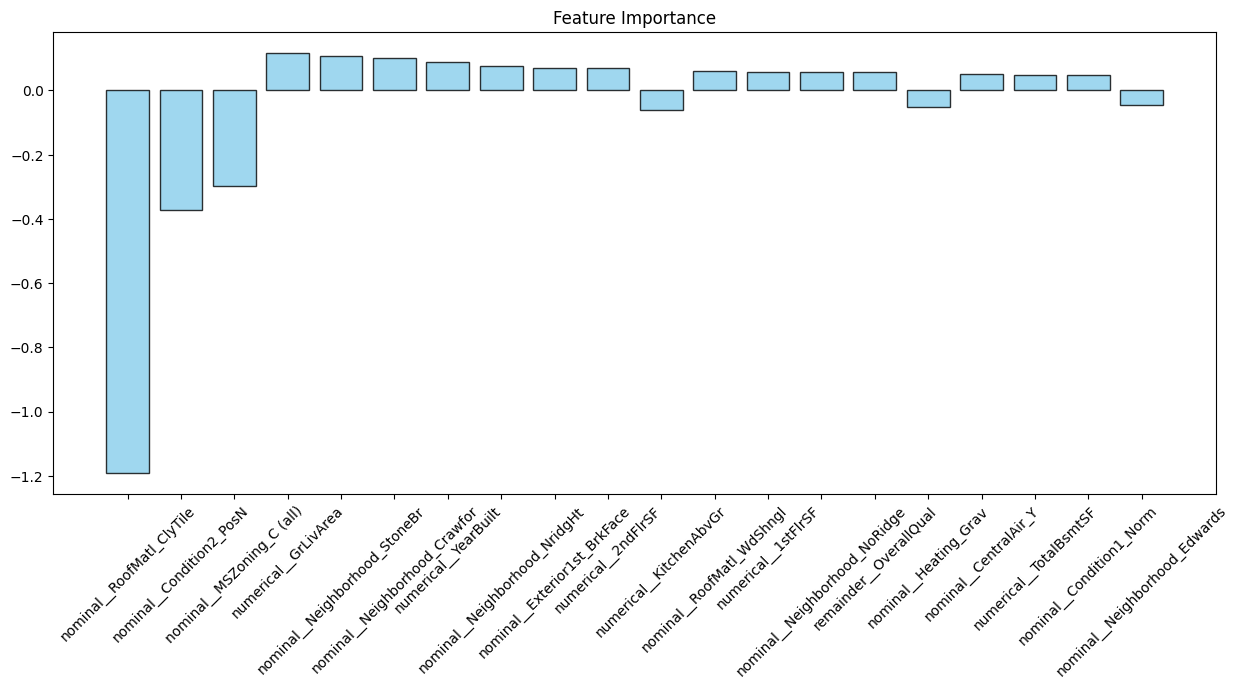

In [93]:
# Feature Importance
importances = grid_search.best_estimator_.coef_

# Get the feature names
feature_names = pipeline.get_feature_names_out()

# Order the features by importance
indices = np.argsort(np.abs(importances))[::-1]
feature_names = np.array(feature_names)
feature_names = feature_names[indices]
importances = importances[indices]

# Plot the first 20 features
plt.figure(figsize=(15, 6))
plt.bar(feature_names[:20], importances[:20], color='skyblue', alpha=0.8, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Feature Importance')
plt.show()


This looks personal, seems like linear regressions have some sort of hate bias towards ClyTile roofs.

**Distributions**

Number of inf: 0


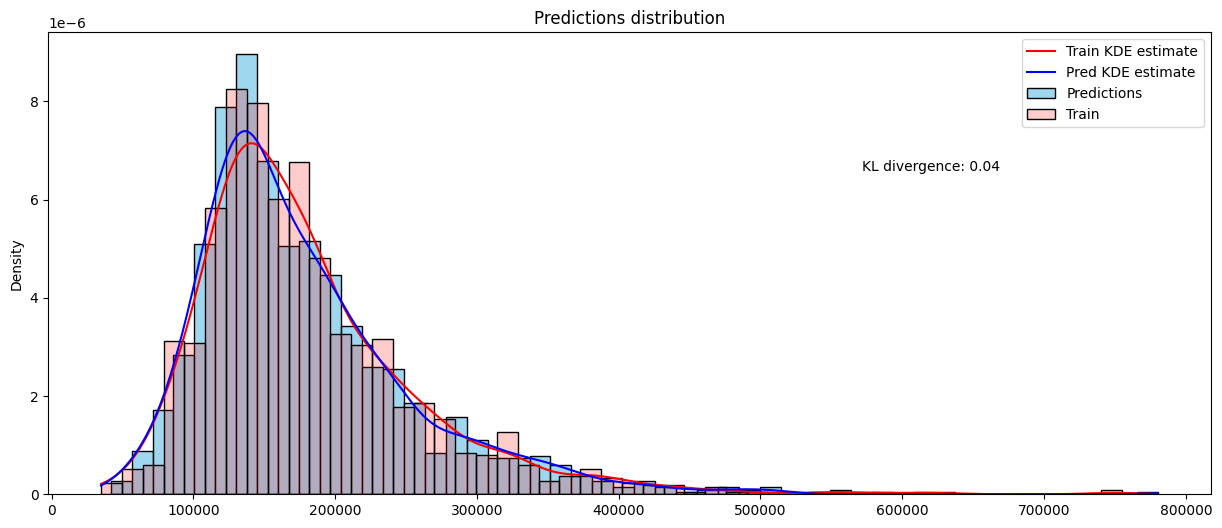

In [94]:
# Distributions
y_pred = grid_search.best_estimator_.predict(X_test)
y_test = np.expm1(y_pred)

print('Number of inf:', sum(np.isinf(y_test)))
# discard inf
y_test = y_test[~np.isinf(y_test)]

kde_train = stats.gaussian_kde(np.expm1(y_train))
kde_test = stats.gaussian_kde(y_test)

x = np.linspace(min(np.expm1(y_train).min(), y_test.min()), max(np.expm1(y_train).max(), y_test.max()), 1000)
kl_div = kl_divergence(kde_train(x), kde_test(x))

# Plot distribution of the predictions
plt.figure(figsize=(15, 6))
sns.histplot(y_test, stat='density', color='skyblue', label='Predictions', alpha = 0.8)
plt.plot(x, kde_train(x), color='red', label='Train KDE estimate')
plt.plot(x, kde_test(x), color='blue', label='Pred KDE estimate')
plt.text(0.7, 0.7, f'KL divergence: {kl_div:.2f}', transform=plt.gca().transAxes)
sns.histplot(np.expm1(y_train), stat='density', color='red', label='Train', alpha=0.2)
plt.title('Predictions distribution')
plt.legend()
plt.show()


In [95]:
best_ElasticNet = grid_search.best_estimator_

**Val Results**

In [96]:
X_train = train_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df_skewed['SalePrice']
X_val = val_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_val = val_df_skewed['SalePrice']

X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)

best_ElasticNet.fit(X_train, y_train)

y_pred = best_ElasticNet.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print('Mean squared error:', mse)


Mean squared error: 0.01531097429363048


In [97]:

results = pd.concat([results, pd.DataFrame({'Model': f'ElasticNet', 'Parameters': "look in best_ElasticNet", 'MSE': mse, 
                                             'MBE': np.mean(y_val - y_pred), 'R2': r2_score(y_val, y_pred)}, index=[0])], ignore_index=True) 
results

,Model,Parameters,MSE,MBE,R2
0,Linear Regression Baseline,OverallQual,0.053404,-0.007321,0.713821
1,Linear Regression,All features,0.015980,-0.002390,0.914366
2,Lasso Regression,alpha = 0.0006000000000000001,0.016495,-0.002710,0.911606
3,ElasticNet,"alpha = 0.0004, l1_ratio = 0.9",NaN,NaN,0.876527
4,ElasticNet,look in best_ElasticNet,0.015311,-0.002885,0.917952


## Gradient Boosting Regressor

In [98]:
X_train = train_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df_skewed['SalePrice']
X_val = val_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_val = val_df_skewed['SalePrice']
X_test = test_df_skewed.drop(['Id'], axis=1)

X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)
X_test = pipeline.transform(X_test)

In [99]:
# Concat train and val sets
X_train = np.concatenate((X_train, X_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)

In [100]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# Cross validation hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import get_scorer_names

param_grid = {'n_estimators': [500, 520, 550],
              'max_depth': [4, 5, 6],
              'learning_rate': [0.01, 0.05, 0.1],
              'subsample': [0.5, 0.7],
              'max_features': [0.5, 0.7]}
model = GradientBoostingRegressor(random_state=42, max_depth= 5, max_features=0.4, learning_rate=0.05, subsample=0.5, verbose=1)


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1509           0.0112            4.06s
         2           0.1397           0.0099            3.36s
         3           0.1263           0.0014            3.09s
         4           0.1121          -0.0034            3.40s
         5           0.1079           0.0174            3.33s
         6           0.0991           0.0042            3.29s
         7           0.0932           0.0098            3.25s
         8           0.0916           0.0178            3.16s
         9           0.0818          -0.0033            3.18s
        10           0.0796           0.0129            3.16s
        20           0.0395          -0.0047            2.94s
        30           0.0256          -0.0003            2.87s
        40           0.0181          -0.0020            2.92s
        50           0.0129          -0.0000            3.13s
      

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                 max_depth=5, max_features=0.4,
                                                 random_state=42, subsample=0.5,
                                                 verbose=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 5, 6], 'max_features': [0.5, 0.7],
                         'n_estimators': [500, 520, 550],
                         'subsample': [0.5, 0.7]},
             scoring='neg_mean_squared_error', verbose=10)

In [101]:
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)



Best parameters: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 0.5, 'n_estimators': 520, 'subsample': 0.7}
Best score: -0.015727974092359993


In [102]:
# Fit the model with the best hyperparameters
model = GradientBoostingRegressor(random_state=42, learning_rate=0.05, max_depth=4, max_features=0.5, n_estimators=550, subsample=0.7, verbose=1)

model.fit(X_train, y_train)

best_model_GB = model

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1509           0.0112            4.94s
         2           0.1397           0.0099            5.43s
         3           0.1263           0.0014            4.71s
         4           0.1121          -0.0034            4.78s
         5           0.1079           0.0174            4.42s
         6           0.0991           0.0042            4.40s
         7           0.0932           0.0098            4.16s
         8           0.0916           0.0178            4.09s
         9           0.0818          -0.0033            4.02s
        10           0.0796           0.0129            3.92s
        20           0.0395          -0.0047            3.46s
        30           0.0256          -0.0003            3.23s
        40           0.0181          -0.0020            3.17s
        50           0.0129          -0.0000            3.13s
        60           0.0110           0.0013            3.04s
       

In [103]:
y_pred = model.predict(X_test)
y_test = np.expm1(y_pred)


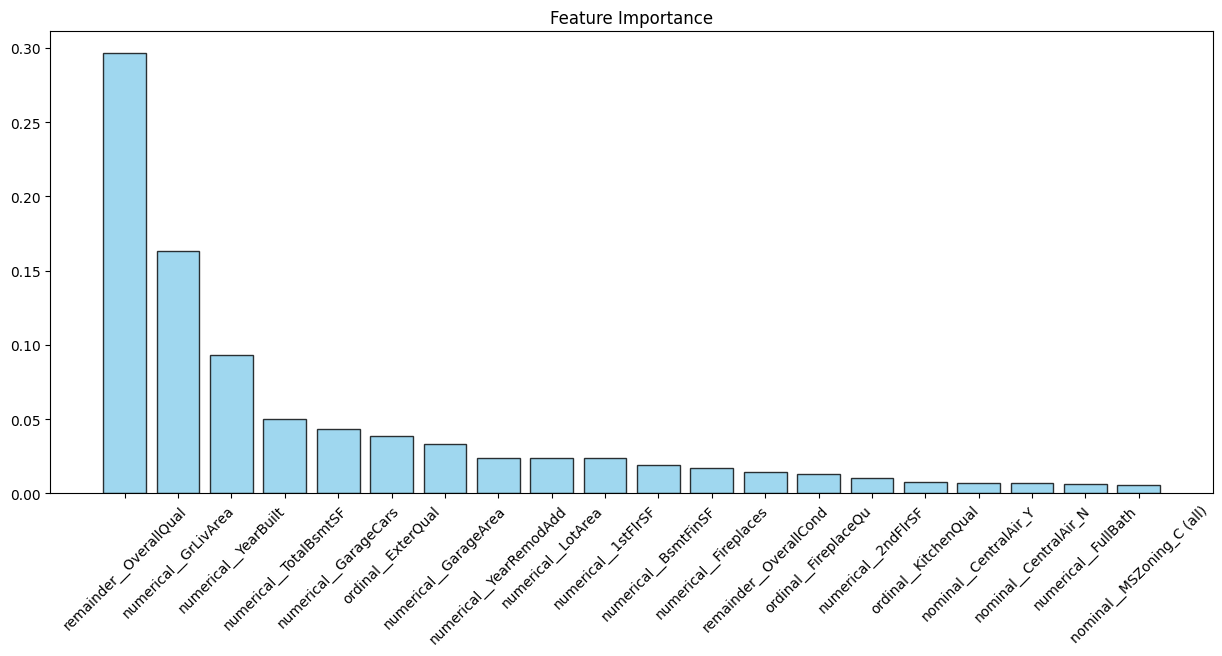

In [104]:
# Plot the feature importance
importances = model.feature_importances_

# Order the features by importance
indices = np.argsort(importances)[::-1]
feature_names = pipeline.get_feature_names_out()
feature_names = np.array(feature_names)
feature_names = feature_names[indices]
importances = importances[indices]

# Plot the first 20 features
plt.figure(figsize=(15, 6))
plt.bar(feature_names[:20], importances[:20], color='skyblue', alpha=0.8, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Feature Importance')
plt.show()


This analysis makes much more sense, we get the most intiutive features, Overall Quality of the house, the size, the year built, Basement size, garage, etc.

As before, let's plot the distribution of the predictions.


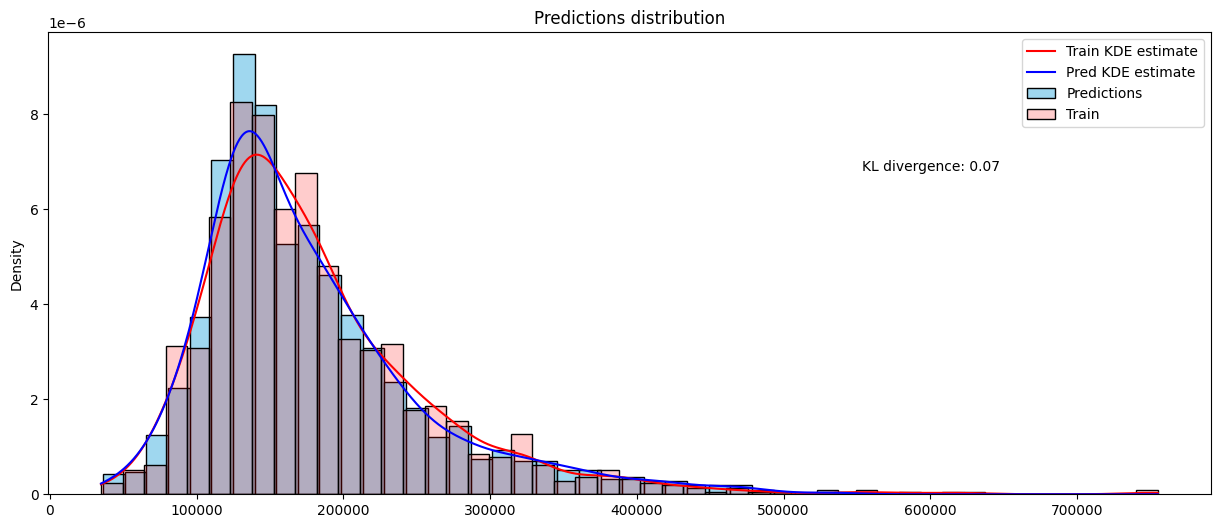

In [105]:
# plot distribution of the predictions
kde_train = stats.gaussian_kde(np.expm1(y_train))
kde_test = stats.gaussian_kde(y_test)

x = np.linspace(min(np.expm1(y_train).min(), y_test.min()), max(np.expm1(y_train).max(), y_test.max()), 1000)
kl_div = kl_divergence(kde_train(x), kde_test(x))

plt.figure(figsize=(15, 6))
sns.histplot(y_test, stat='density', color='skyblue', label='Predictions', alpha = 0.8)
plt.plot(x, kde_train(x), color='red', label='Train KDE estimate')
plt.plot(x, kde_test(x), color='blue', label='Pred KDE estimate')
plt.text(0.7, 0.7, f'KL divergence: {kl_div:.2f}', transform=plt.gca().transAxes)
sns.histplot(np.expm1(y_train), stat='density', color='red', label='Train', alpha=0.2)
plt.title('Predictions distribution')
plt.legend()
plt.show()


**Val Results**

In [106]:
X_train = train_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df_skewed['SalePrice']
X_val = val_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_val = val_df_skewed['SalePrice']
X_test = test_df_skewed.drop(['Id'], axis=1)

X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)
X_test = pipeline.transform(X_test)

In [107]:
best_model_GB.fit(X_train,y_train)

y_pred = best_model_GB.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print('Mean squared error:', mse)


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1473           0.0098            3.57s
         2           0.1229          -0.0238            3.15s
         3           0.1256           0.0376            3.07s
         4           0.1113          -0.0046            3.01s
         5           0.1023           0.0051            3.15s
         6           0.1018           0.0239            3.11s
         7           0.0911          -0.0024            3.25s
         8           0.0839           0.0027            3.19s
         9           0.0824           0.0160            3.27s
        10           0.0717          -0.0078            3.28s
        20           0.0392          -0.0010            2.85s
        30           0.0223          -0.0026            2.65s
        40           0.0168          -0.0027            2.53s
        50           0.0127           0.0008            2.50s
        60           0.0095          -0.0020            2.41s
       

In [108]:

results = pd.concat([results, pd.DataFrame({'Model': f'GBM', 'Parameters': "look in best_model_GB", 'MSE': mse, 
                                             'MBE': np.mean(y_val - y_pred), 'R2': r2_score(y_val, y_pred)}, index=[0])], ignore_index=True) 
results


,Model,Parameters,MSE,MBE,R2
0,Linear Regression Baseline,OverallQual,0.053404,-0.007321,0.713821
1,Linear Regression,All features,0.015980,-0.002390,0.914366
2,Lasso Regression,alpha = 0.0006000000000000001,0.016495,-0.002710,0.911606
3,ElasticNet,"alpha = 0.0004, l1_ratio = 0.9",NaN,NaN,0.876527
4,ElasticNet,look in best_ElasticNet,0.015311,-0.002885,0.917952
5,GBM,look in best_model_GB,0.016230,-0.001705,0.913029


### 5.4 Random Forest Regressor

In [109]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15], 'max_features': [0.5, 0.7, 0.9],
                'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

model = RandomForestRegressor(random_state=42, verbose=1)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
params_best_string = ', '.join([f'{key} = {value}' for key, value in grid_search.best_params_.items()])

results = pd.concat([results, pd.DataFrame({'Model': 'Random Forest with CV', 'Parameters': params_best_string, 'MSE': -grid_search.best_score_,
                            'MBE': None, 'R2': None}, index=[0])], ignore_index=True)
results

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.5s


Best parameters: {'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: -0.020232607259825945


,Model,Parameters,MSE,MBE,R2
0,Linear Regression Baseline,OverallQual,0.053404,-0.007321,0.713821
1,Linear Regression,All features,0.015980,-0.00239,0.914366
2,Lasso Regression,alpha = 0.0006000000000000001,0.016495,-0.00271,0.911606
3,ElasticNet,"alpha = 0.0004, l1_ratio = 0.9",NaN,NaN,0.876527
4,ElasticNet,look in best_ElasticNet,0.015311,-0.002885,0.917952
5,GBM,look in best_model_GB,0.016230,-0.001705,0.913029
6,Random Forest with CV,"max_depth = 15, max_features = 0.5, min_sample...",0.020233,None,None


In [110]:
best_RF = grid_search.best_estimator_



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


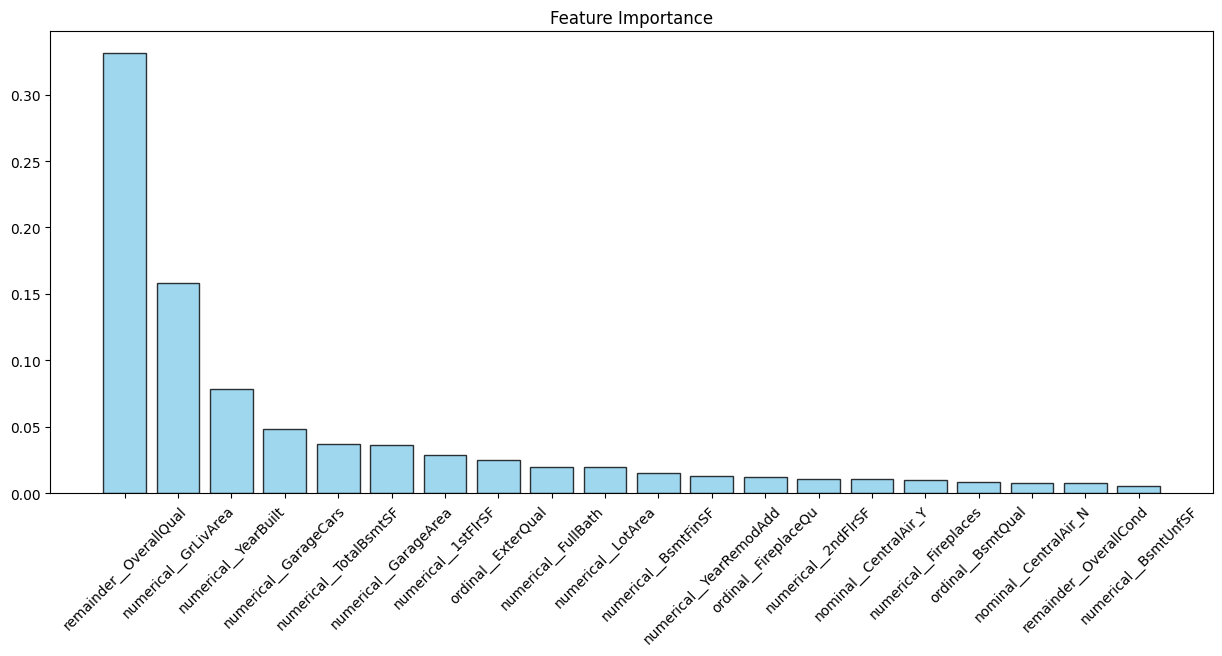

In [111]:


best_RF.fit(X_train, y_train)

y_pred = best_RF.predict(X_test)
y_test = np.expm1(y_pred)

# Plot the feature importance
importances = best_RF.feature_importances_

# Order the features by importance
indices = np.argsort(importances)[::-1]
feature_names = pipeline.get_feature_names_out()
feature_names = np.array(feature_names)
feature_names = feature_names[indices]
importances = importances[indices]

# Plot the first 20 features
plt.figure(figsize=(15, 6))
plt.bar(feature_names[:20], importances[:20], color='skyblue', alpha=0.8, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Feature Importance')
plt.show()


**Distribution**

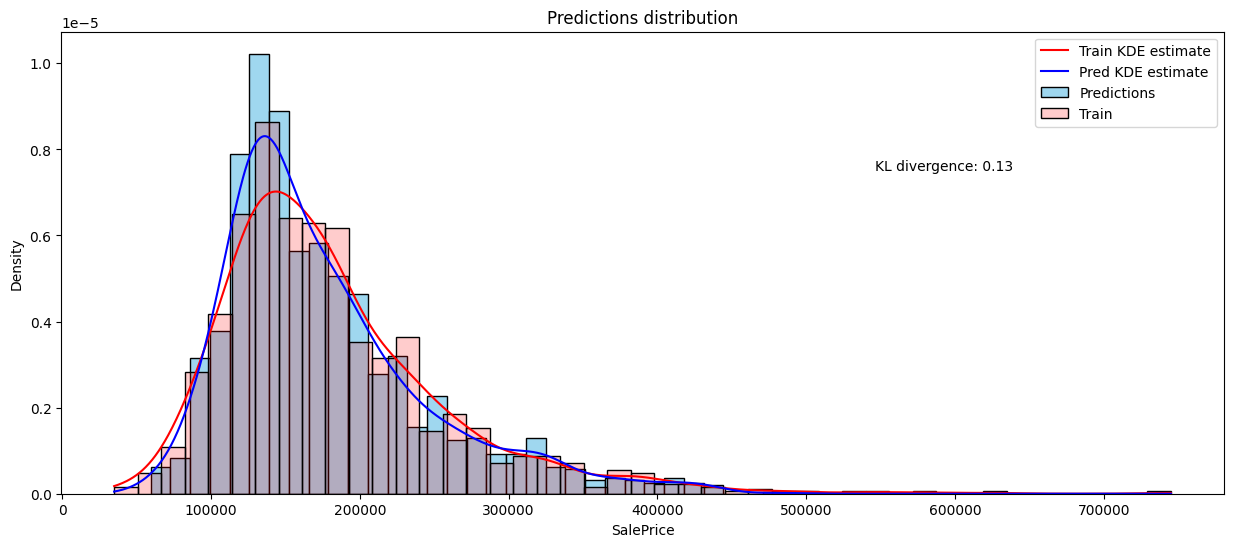

In [112]:
kde_train = stats.gaussian_kde(np.expm1(y_train))
kde_test = stats.gaussian_kde(y_test)

x = np.linspace(min(np.expm1(y_train).min(), y_test.min()), max(np.expm1(y_train).max(), y_test.max()), 1000)
kl_div = kl_divergence(kde_train(x), kde_test(x))

plt.figure(figsize=(15, 6))
sns.histplot(y_test, stat='density', color='skyblue', label='Predictions', alpha = 0.8)
plt.plot(x, kde_train(x), color='red', label='Train KDE estimate')
plt.plot(x, kde_test(x), color='blue', label='Pred KDE estimate')
plt.text(0.7, 0.7, f'KL divergence: {kl_div:.2f}', transform=plt.gca().transAxes)
sns.histplot(np.expm1(y_train), stat='density', color='red', label='Train', alpha=0.2)
plt.title('Predictions distribution')
plt.legend()
plt.show()


**Val Results**

In [113]:
X_train = train_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df_skewed['SalePrice']
X_val = val_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_val = val_df_skewed['SalePrice']
X_test = test_df_skewed.drop(['Id'], axis=1)

X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)
X_test = pipeline.transform(X_test)

In [114]:
best_RF.fit(X_train, y_train)
y_pred = best_RF.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print('Mean squared error:', mse)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    3.8s


Mean squared error: 0.02094043760880951


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [115]:
results = pd.concat([results, pd.DataFrame({'Model': f'RF', 'Parameters': "look in best_model_RF", 'MSE': mse, 
                                             'MBE': np.mean(y_val - y_pred), 'R2': r2_score(y_val, y_pred)}, index=[0])], ignore_index=True) 
results

,Model,Parameters,MSE,MBE,R2
0,Linear Regression Baseline,OverallQual,0.053404,-0.007321,0.713821
1,Linear Regression,All features,0.015980,-0.00239,0.914366
2,Lasso Regression,alpha = 0.0006000000000000001,0.016495,-0.00271,0.911606
3,ElasticNet,"alpha = 0.0004, l1_ratio = 0.9",NaN,NaN,0.876527
4,ElasticNet,look in best_ElasticNet,0.015311,-0.002885,0.917952
5,GBM,look in best_model_GB,0.016230,-0.001705,0.913029
6,Random Forest with CV,"max_depth = 15, max_features = 0.5, min_sample...",0.020233,None,None
7,RF,look in best_model_RF,0.020940,-0.005724,0.887786


# Ensamble model

In [116]:
best_model_LR

LinearRegression()

In [117]:
best_model_LR_Lasso

LassoCV(alphas=array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004 ,
       0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0...
       0.0953, 0.0954, 0.0955, 0.0956, 0.0957, 0.0958, 0.0959, 0.096 ,
       0.0961, 0.0962, 0.0963, 0.0964, 0.0965, 0.0966, 0.0967, 0.0968,
       0.0969, 0.097 , 0.0971, 0.0972, 0.0973, 0.0974, 0.0975, 0.0976,
       0.0977, 0.0978, 0.0979, 0.098 , 0.0981, 0.0982, 0.0983, 0.0984,
       0.0985, 0.0986, 0.0987, 0.0988, 0.0989, 0.099 , 0.0991, 0.0992,
       0.0993, 0.0994, 0.0995, 0.0996, 0.0997, 0.0998, 0.0999, 0.1   ]),
        cv=5, n_alphas=500, random_state=42, verbose=True)

In [118]:
best_ElasticNet

ElasticNet(alpha=0.0004, l1_ratio=0.9, random_state=42)

In [119]:
best_model_GB

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features=0.5,
                          n_estimators=550, random_state=42, subsample=0.7,
                          verbose=1)

In [120]:
results

,Model,Parameters,MSE,MBE,R2
0,Linear Regression Baseline,OverallQual,0.053404,-0.007321,0.713821
1,Linear Regression,All features,0.015980,-0.00239,0.914366
2,Lasso Regression,alpha = 0.0006000000000000001,0.016495,-0.00271,0.911606
3,ElasticNet,"alpha = 0.0004, l1_ratio = 0.9",NaN,NaN,0.876527
4,ElasticNet,look in best_ElasticNet,0.015311,-0.002885,0.917952
5,GBM,look in best_model_GB,0.016230,-0.001705,0.913029
6,Random Forest with CV,"max_depth = 15, max_features = 0.5, min_sample...",0.020233,None,None
7,RF,look in best_model_RF,0.020940,-0.005724,0.887786


In [121]:
X_train = train_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_train = train_df_skewed['SalePrice']
X_val = val_df_skewed.drop(['Id', 'SalePrice'], axis=1)
y_val = val_df_skewed['SalePrice']
X_test = test_df_skewed.drop(['Id'], axis=1)

X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)
X_test = pipeline.transform(X_test)



In [122]:
# ensamble model 
from sklearn.ensemble import StackingRegressor
# Neural Network    
from sklearn.neural_network import MLPRegressor

estimators = [('LR', best_model_LR), ('Lasso', best_model_LR_Lasso), ('ElasticNet', best_ElasticNet), ('GB', best_model_GB)]
# Ensamble model, mean of the predictions
model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())


model.fit(X_train, y_train)



........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1473           0.0098            3.38s
         2           0.1229          -0.0238            3.07s
         3           0.1256           0.0376            3.14s
         4           0.1113          -0.0046            3.16s
         5           0.1023           0.0051            2.97s
         6           0.1018           0.0239            2.83s
         7           0.0911          -0.0024            3.00s
         8           0.0839           0.0027            2.89s
         9           0.0824           0.0160            2.90s
        10           0.0717          -0.0078            2.96s
        20           0.0392          -0.0010            2.74s
        30           0.0223          -0.0026            2.75s
        40           0.0168          -0.0027            2.79s
        50           0.0127           0.0008            2.78s
        60           0.0095          -0.0020            2.86s
       

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1368           0.0125            2.20s
         2           0.1302           0.0193            2.41s
         3           0.1190           0.0041            2.33s
         4           0.1213           0.0356            2.30s
         5           0.1053          -0.0108            2.30s
         6           0.0959           0.0030            2.28s
         7           0.0839          -0.0058            2.33s
         8           0.0808           0.0127            2.25s
         9           0.0762           0.0071            2.22s
        10           0.0695           0.0009            2.22s
        20           0.0402           0.0003            2.20s
        30           0.0236           0.0017            2.09s
        40           0.0156          -0.0025            2.04s
        50           0.0116          -0.0002            2.00s
        60           0.0091          -0.0020            1.97s
       

StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('Lasso',
                               LassoCV(alphas=array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038,...
       0.0985, 0.0986, 0.0987, 0.0988, 0.0989, 0.099 , 0.0991, 0.0992,
       0.0993, 0.0994, 0.0995, 0.0996, 0.0997, 0.0998, 0.0999, 0.1   ]),
                                       cv=5, n_alphas=500, random_state=42,
                                       verbose=True)),
                              ('ElasticNet',
                               ElasticNet(alpha=0.0004, l1_ratio=0.9,
                                          random_state=42)),
                              ('GB',
                               GradientBoostingRegressor(learning_rate=0.05,
                                                         max_depth=4,
                                                         max_features=0.5,
                                                         n_estimators=550,
                                                         random_state=42,
                                                         subsample=0.7,
                                                         verbose=1))],
                  final_estimator=LinearRegression())

In [123]:
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print('Mean squared error:', mse)


Mean squared error: 0.015090485536343182


In [124]:
results = pd.concat([results, pd.DataFrame({'Model': f'Ensamble Model', 'Parameters': None, 'MSE': mse, 
                                             'MBE': np.mean(y_val - y_pred), 'R2': r2_score(y_val, y_pred)}, index=[0])], ignore_index=True) 
results

,Model,Parameters,MSE,MBE,R2
0,Linear Regression Baseline,OverallQual,0.053404,-0.007321,0.713821
1,Linear Regression,All features,0.015980,-0.00239,0.914366
2,Lasso Regression,alpha = 0.0006000000000000001,0.016495,-0.00271,0.911606
3,ElasticNet,"alpha = 0.0004, l1_ratio = 0.9",NaN,NaN,0.876527
4,ElasticNet,look in best_ElasticNet,0.015311,-0.002885,0.917952
5,GBM,look in best_model_GB,0.016230,-0.001705,0.913029
6,Random Forest with CV,"max_depth = 15, max_features = 0.5, min_sample...",0.020233,None,None
7,RF,look in best_model_RF,0.020940,-0.005724,0.887786
8,Ensamble Model,None,0.015090,-0.001442,0.919134


In [125]:

# Stack X_train and X_val
X_train = np.concatenate((X_train, X_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)

In [126]:
model.fit(X_train, y_train)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1509           0.0112            2.76s
         2           0.1397           0.0099            3.26s
         3           0.1263           0.0014            3.28s
         4           0.1121          -0.0034            3.18s
         5           0.1079           0.0174            3.18s
         6           0.0991           0.0042            3.23s
         7           0.0932           0.0098            3.13s
         8           0.0916           0.0178            3.23s
         9           0.0818          -0.0033            3.19s
        10           0.0796           0.0129            3.09s
        20           0.0395          -0.0047            3.13s
        30           0.0256          -0.0003            2.97s
        40           0.0181          -0.0020            2.98s
        50           0.0129          -0.0000            2.97s
        60           0.0110           0.0013            2.91s
       

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.1461           0.0114            2.51s
         2           0.1337           0.0063            3.17s
         3           0.1198          -0.0009            2.76s
         4           0.1149           0.0190            2.75s
         5           0.1089           0.0145            2.68s
         6           0.1054           0.0177            2.84s
         7           0.0942          -0.0026            2.81s
         8           0.0831          -0.0044            2.70s
         9           0.0870           0.0288            2.73s
        10           0.0788          -0.0007            2.70s
        20           0.0448           0.0121            2.66s
        30           0.0252           0.0039            2.75s
        40           0.0184           0.0038            2.94s
        50           0.0139           0.0035            2.84s
        60           0.0097          -0.0027            2.76s
       

StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('Lasso',
                               LassoCV(alphas=array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,
       0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024,
       0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031, 0.0032,
       0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038,...
       0.0985, 0.0986, 0.0987, 0.0988, 0.0989, 0.099 , 0.0991, 0.0992,
       0.0993, 0.0994, 0.0995, 0.0996, 0.0997, 0.0998, 0.0999, 0.1   ]),
                                       cv=5, n_alphas=500, random_state=42,
                                       verbose=True)),
                              ('ElasticNet',
                               ElasticNet(alpha=0.0004, l1_ratio=0.9,
                                          random_state=42)),
                              ('GB',
                               GradientBoostingRegressor(learning_rate=0.05,
                                                         max_depth=4,
                                                         max_features=0.5,
                                                         n_estimators=550,
                                                         random_state=42,
                                                         subsample=0.7,
                                                         verbose=1))],
                  final_estimator=LinearRegression())

In [127]:
y_pred = model.predict(X_test)
y_test = np.expm1(y_pred)


**Analysis:**

This last part of the model selection was not so neat, sorry. The best model ended up being the ensamble model, this is mainly due that the ensamble model helps reducing bias, by taking the different bias of all the estimators. 
Analysing the feature importance of the models, the fact of taking the absolute value of the coeficients of the Linear Regression models might not be the best way ro do it. This weights encodes also difference in scales between variables, eventhough we have pre-processed the variables, some numerical variables where left without scalling.
Further analysis and improvements can be taken, and I'll be happy to discuss about them in a future exchange, if possible.

**RMK: In case you want to run it, I've add a .yaml file (envchall.yalm) with the environment I've been using, because I didn't notice that I was using some old packages version that migth cause some problems (numpy<2, pandas<2, ...). Sorry for this problems !**

****

**Submit to kaggle**

In [128]:
import kaggle

if True:
    submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_test})
    submission.to_csv('submission.csv', index=False)

    submission.head()


In [129]:
if True:
    ##### Upload the submission
    submission_file = 'submission.csv'
    kaggle.api.competition_submit(submission_file, 'Ensamble LR+Lass+Elastic+GBM', 'house-prices-advanced-regression-techniques')

    print('Submission uploaded successfully!')

100%|██████████| 35.1k/35.1k [00:00<00:00, 85.5kB/s]


Submission uploaded successfully!


**Results:** Best score = 0.12383, LeaderBoard = 429 (top 10%). It works for me!